## Step1:-Import the libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.options.display.max_columns = None
from imblearn.over_sampling import SMOTE
from scipy.stats import stats,ttest_ind,chi2_contingency
# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split

from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score,f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,recall_score,precision_score,precision_recall_curve
from sklearn.metrics import roc_curve, RocCurveDisplay
from sklearn.metrics import accuracy_score
from scipy import stats
from sklearn.impute import KNNImputer
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

from itertools import cycle

from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, LabelBinarizer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
import statsmodels
import statsmodels.api as sm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier,BaggingClassifier
import xgboost
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report,plot_confusion_matrix
from sklearn.metrics import  plot_roc_curve, plot_precision_recall_curve
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# import function to perform feature selection
from sklearn.feature_selection import RFE, SequentialFeatureSelector

## Step2:- Data Understanding

##### 2.1 Read the dataset and print the first five observations

In [2]:
df=pd.read_csv("data.csv")
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Purchase
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [3]:
print('number of rows and columns are :',df.shape)

number of rows and columns are : (12330, 18)


#### 2.2 Check the Data Type
##### Check the data type of each variable. If the data type is not as per the data definition, change the data type.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [5]:
df["Weekend"]=df["Weekend"].astype("object")

In [6]:
df["Purchase"]=df["Purchase"].replace({True:1,False:0})

In [7]:
df["Purchase"]=df["Purchase"].astype("object")

#### 2.3 Data description
##### 2.3.1 five-point summary for numerical variables

In [8]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


##### 2.3.2 five-point summary for categorical varoiables

In [9]:
df.describe(include=object)

,Month,VisitorType,Weekend,Purchase
count,12330,12330,12330,12330
unique,10,3,2,2
top,May,Returning_Visitor,False,0
freq,3364,10551,9462,10422


#### 2.5  Summarize observations for categorical variables

In [10]:
for k in df.select_dtypes(include='object').columns:
    print('values of',k,'is')
    print(df[k].value_counts())
    print('Percentage of values in ',k,'is ')
    print(df[k].value_counts(normalize=True))

    print('***************************************************')

values of Month is
May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: Month, dtype: int64
Percentage of values in  Month is 
May     0.272830
Nov     0.243147
Mar     0.154663
Dec     0.140065
Oct     0.044526
Sep     0.036334
Aug     0.035118
Jul     0.035036
June    0.023358
Feb     0.014923
Name: Month, dtype: float64
***************************************************
values of VisitorType is
Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: VisitorType, dtype: int64
Percentage of values in  VisitorType is 
Returning_Visitor    0.855718
New_Visitor          0.137388
Other                0.006894
Name: VisitorType, dtype: float64
***************************************************
values of Weekend is
False    9462
True     2868
Name: Weekend, dtype: int64
Percentage of values in  Weekend is 
False    0.767397
True     0.232603
Name: Weekend, dtype: float64
*****

# <a id='target_plot'></a>
#### 2.6  Visualising Target Variable: Purchase

In [11]:
def barplot(data, feature):
    print("Bar plot of the variable ", feature)
    plt.figure(figsize=(10,7))
    ax=sns.countplot(data=data, x=feature, color='green')
    for p in ax.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax.annotate("{:.2g}%".format(100.*y/len(df)), (x.mean(), y), ha='center', va='bottom')
    plt.show()

Bar plot of the variable  Purchase


<Figure size 200x200 with 0 Axes>

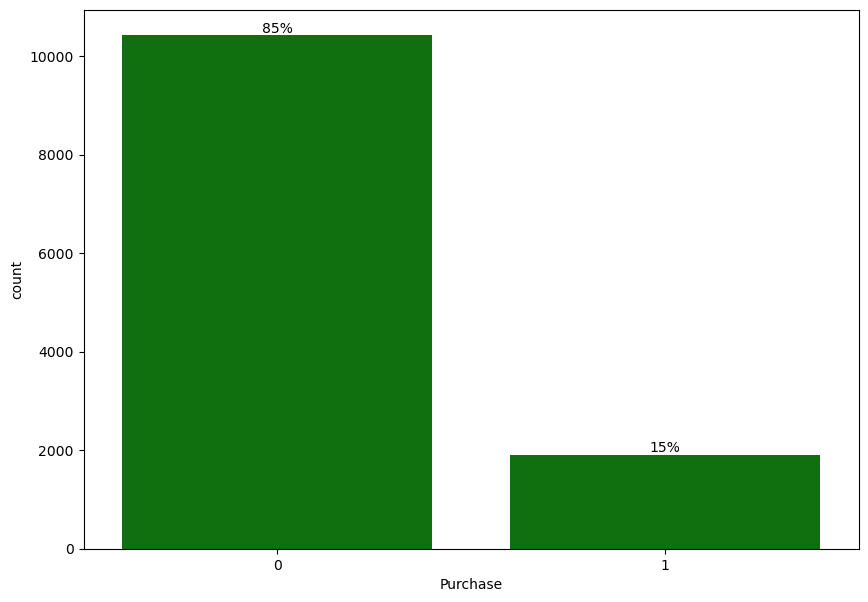

In [12]:
plt.figure(figsize=(2,2))
barplot(df,"Purchase")

###### Has data was imbalanced we have to do the Smote Analysis to balance the target variable 

### Step 3:-Data Cleaning

#### 3.1 Missing Value Treatment

In [13]:
Total = df.isnull().sum().sort_values(ascending=False)          
Percent = (df.isnull().sum()*100/df.isnull().count()).sort_values(ascending=False)   
missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])    
missing_data

,Total,Percentage of Missing Values
Administrative,0,0.0
Administrative_Duration,0,0.0
Weekend,0,0.0
VisitorType,0,0.0
TrafficType,0,0.0
Region,0,0.0
Browser,0,0.0
OperatingSystems,0,0.0
Month,0,0.0
SpecialDay,0,0.0


#### 3.2 Outlier Treartment 

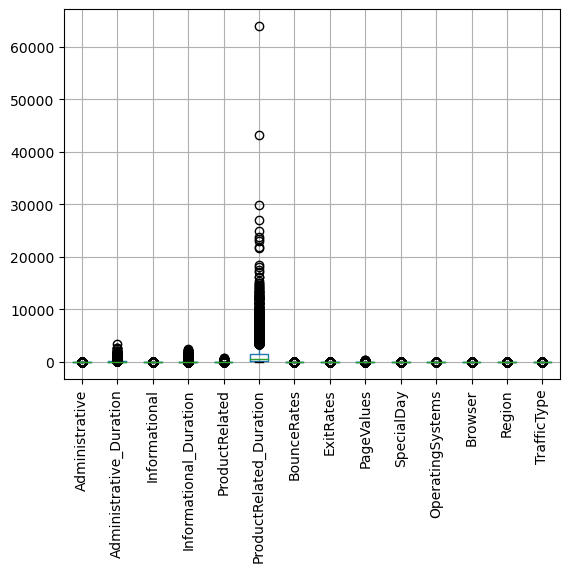

In [14]:
df.boxplot()
plt.xticks(rotation=90)
plt.show()

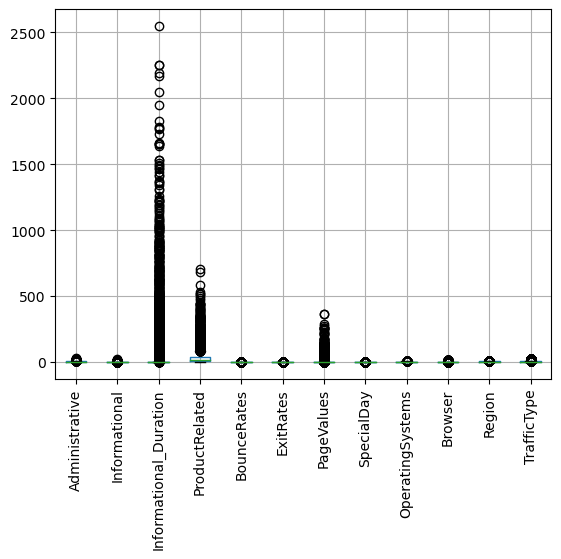

In [15]:
df.drop(["ProductRelated_Duration","Administrative_Duration"],axis=1).boxplot()
plt.xticks(rotation=90)
plt.show()

In [16]:
q1=df.quantile(0.25)
q3=df.quantile(0.75)
iqr=q3-q1
UL=q3+1.5*iqr
LL=q1-1.5*iqr
df1=df[~((df<LL)|(df>UL)).any(axis=1)]
df1.shape

(2550, 18)

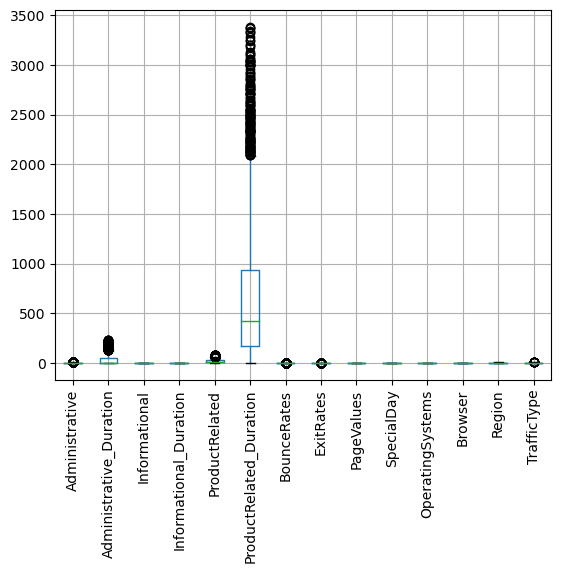

In [17]:
df1.boxplot()
plt.xticks(rotation=90)
plt.show()

### Step 4:- Exploratory Data Analysis(EDA) 

####  4.1 **Univeriate Analysis**
##### 4.1.1 Categorical Columns

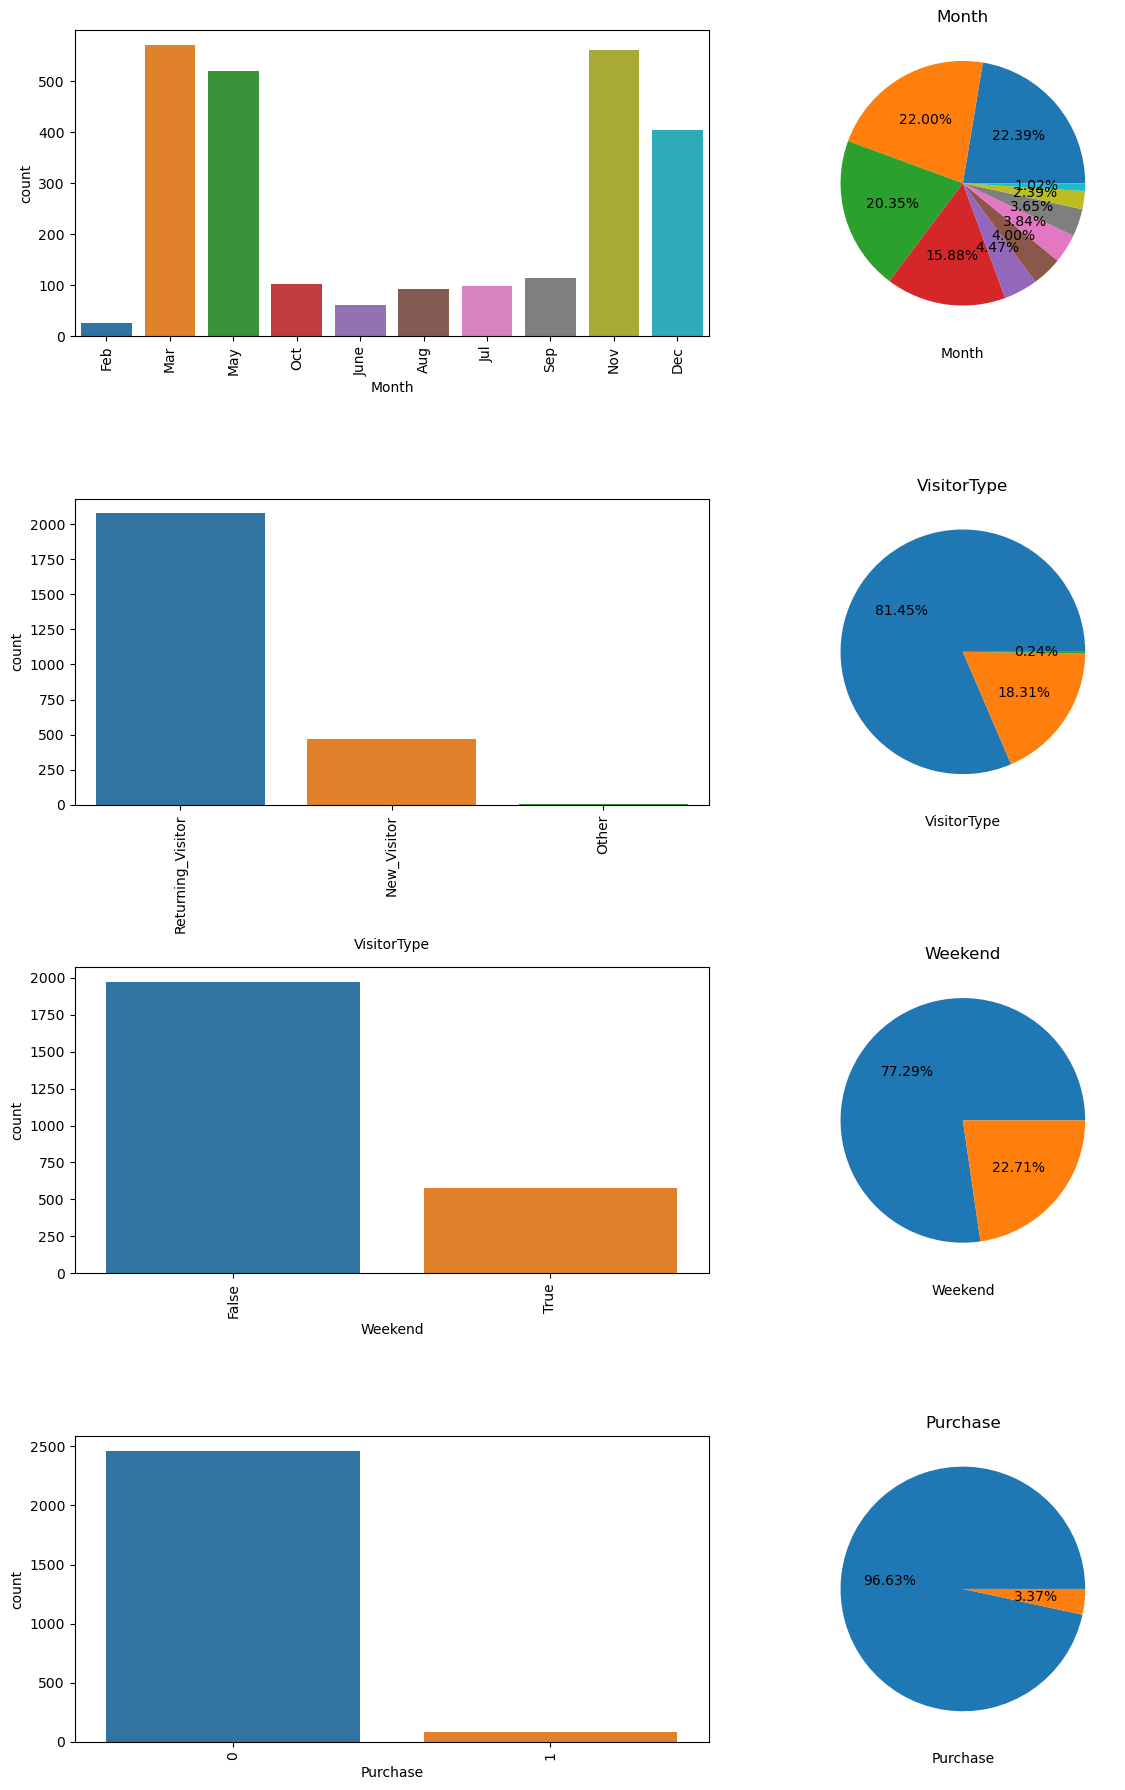

In [18]:
plt.figure(figsize=(13,18))
plot_cat_col = df1.select_dtypes(include=object).columns
c=1
for i in plot_cat_col:
    plt.subplot(4,2,c)
    sns.countplot(x=i,data=df1)
    plt.xticks(rotation=90)
    c+=1
    plt.subplot(4,2,c)
    plt.pie(df1[i].value_counts(),autopct="%.2f%%")
    plt.xlabel(i)
    plt.title(i)
    plt.xticks(rotation=90)
    c+=1
plt.tight_layout()
plt.show()

##### 4.1.2 Numerical Columns 

In [19]:
def boxplot_histplot(data, feature, bins=None, figsize=(12,7)):
    print('Boxplot and Histplot for ', feature)
    fig, (ax_box, ax_hist)=plt.subplots(
    nrows=2,
    sharex=True,
    gridspec_kw = {"height_ratios":(0.25, 0.75)},
    figsize=figsize
    )
    sns.boxplot(data=data, x=feature, color='violet', ax=ax_box, showmeans=True)
    sns.histplotplot(data=data, x=feature, ax=ax_hist, bins=bins)   if bins else sns.histplot(data\
                            =data, x=feature, ax=ax_hist)  
    ax_hist.axvline(data[feature].mean(), color='green', linestyle='--')
    ax_hist.axvline(data[feature].median(), color='black', linestyle='-')
    plt.show()
    

Boxplot and Histplot for  Administrative


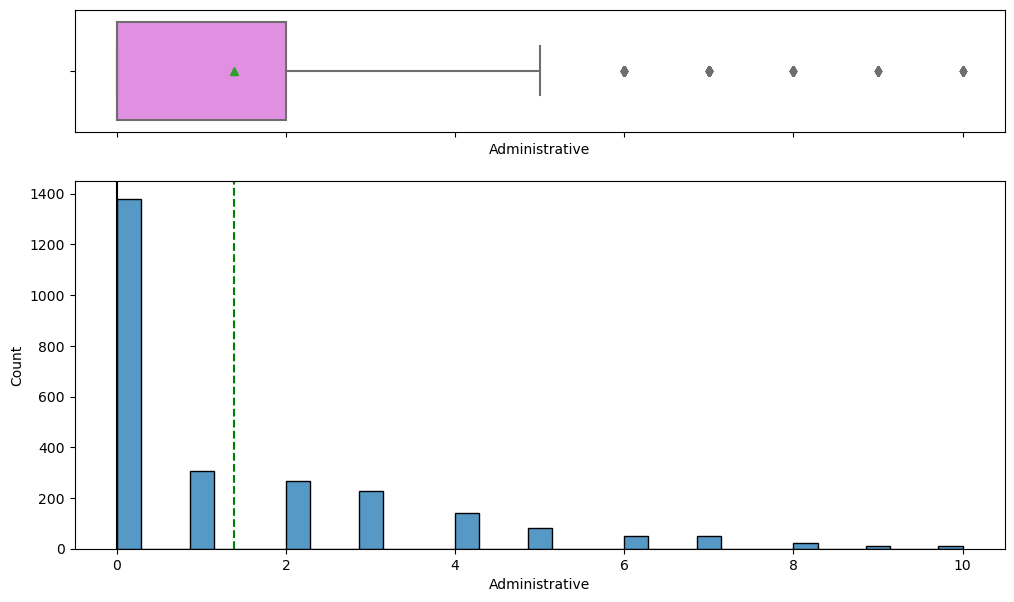

Boxplot and Histplot for  Administrative_Duration


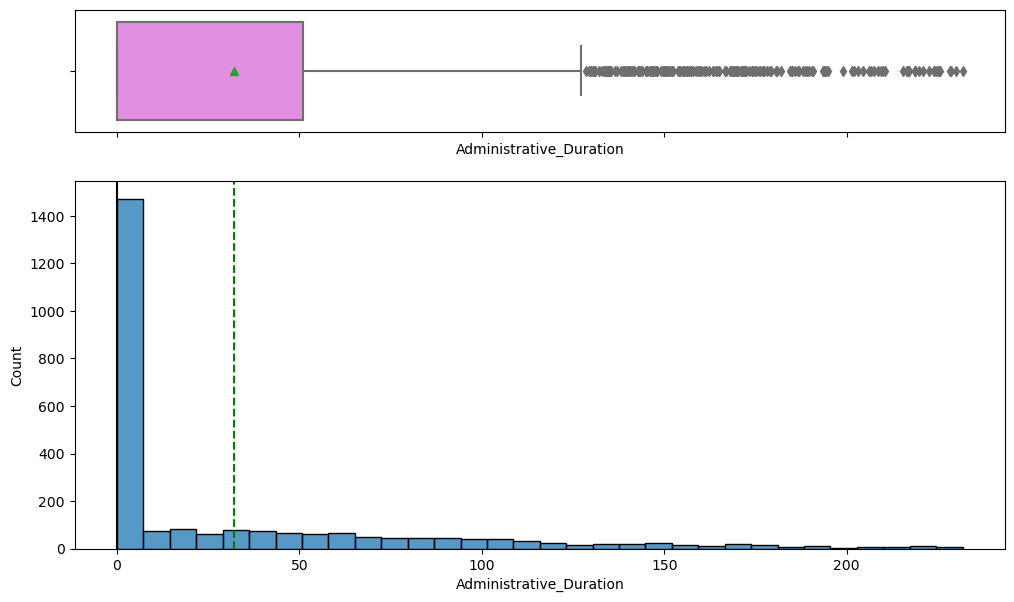

Boxplot and Histplot for  Informational


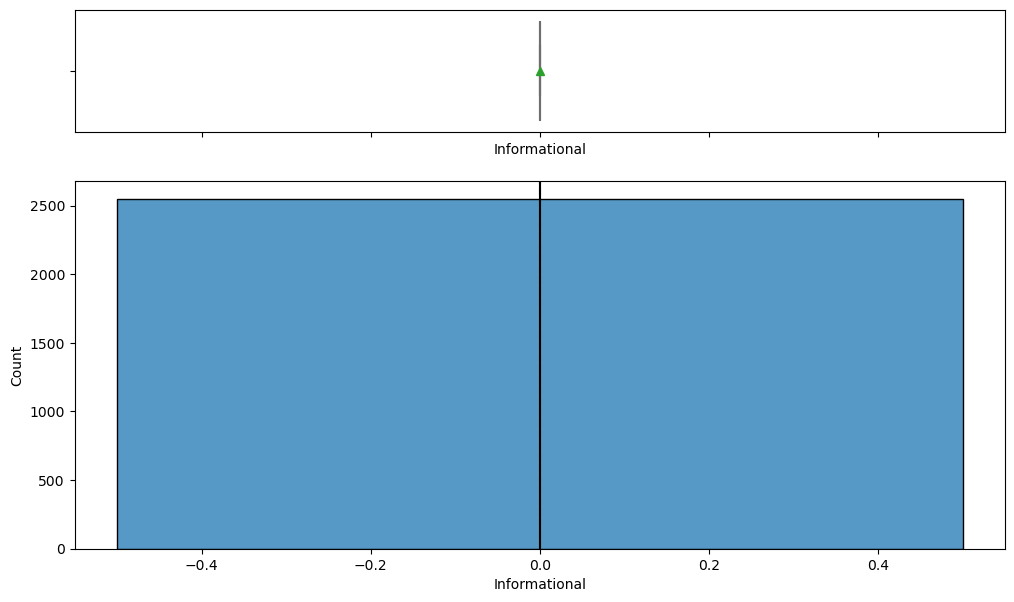

Boxplot and Histplot for  Informational_Duration


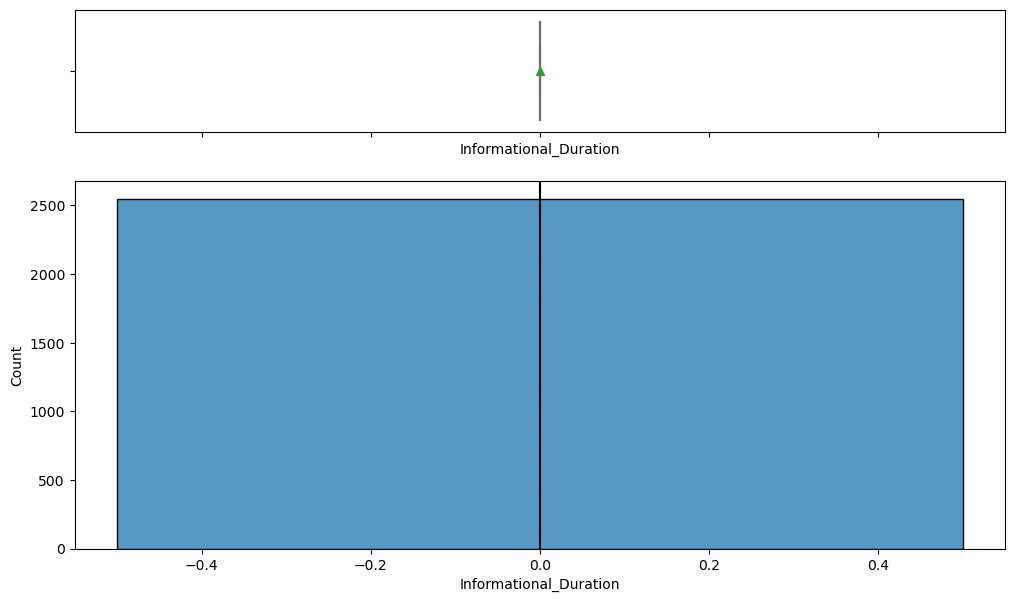

Boxplot and Histplot for  ProductRelated


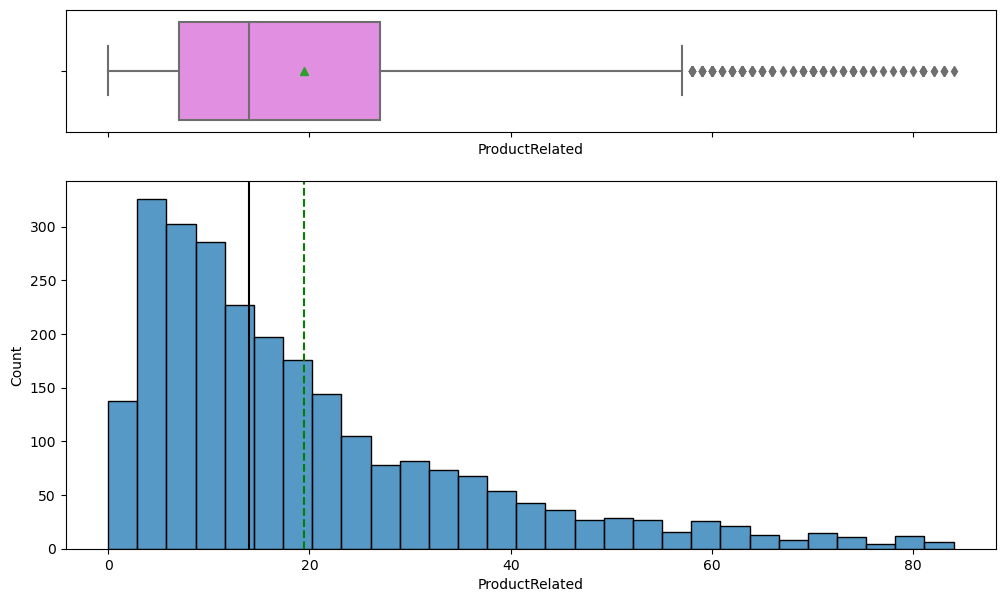

Boxplot and Histplot for  ProductRelated_Duration


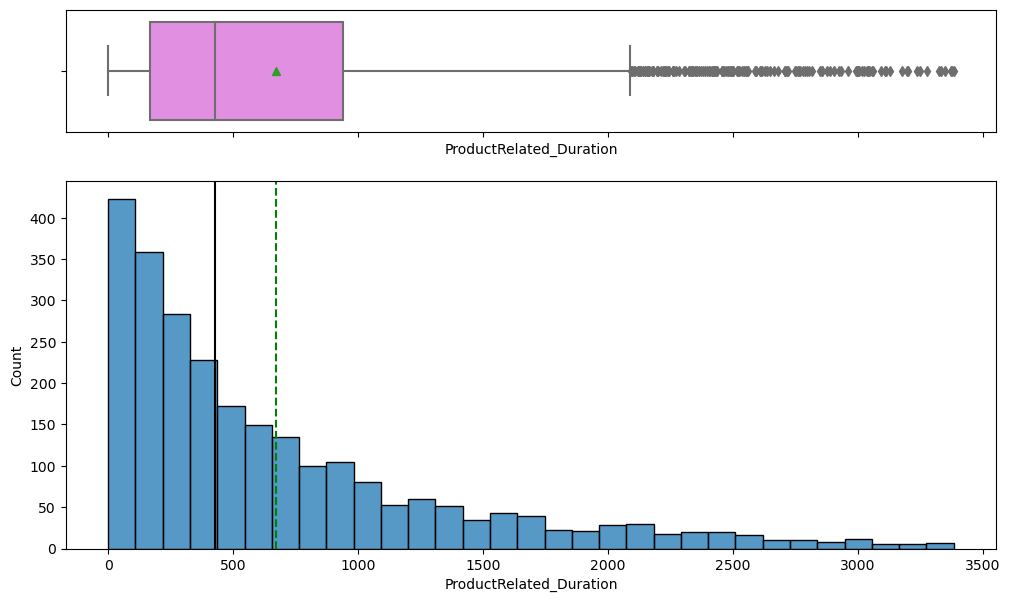

Boxplot and Histplot for  BounceRates


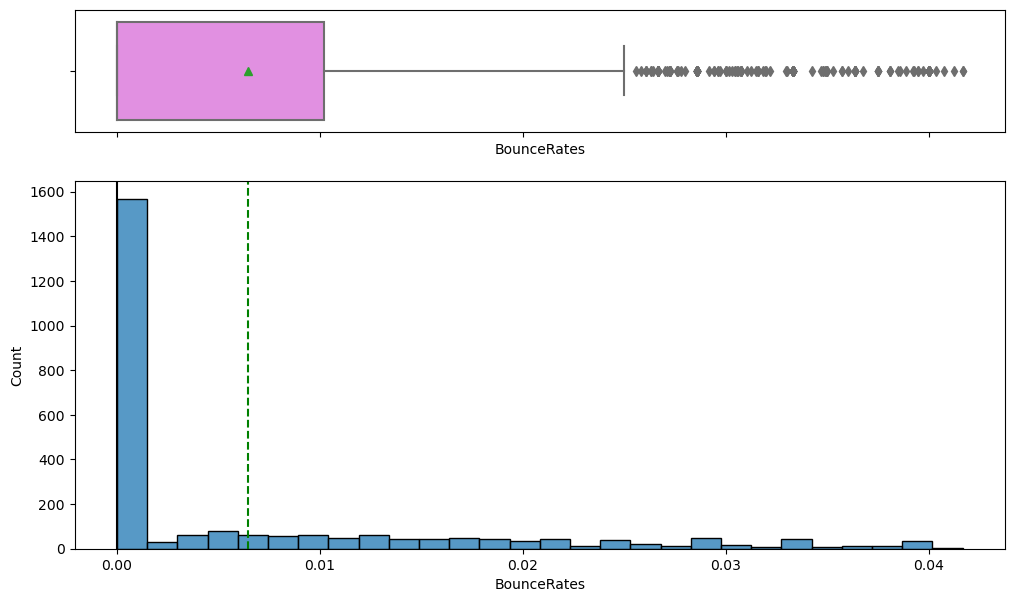

Boxplot and Histplot for  ExitRates


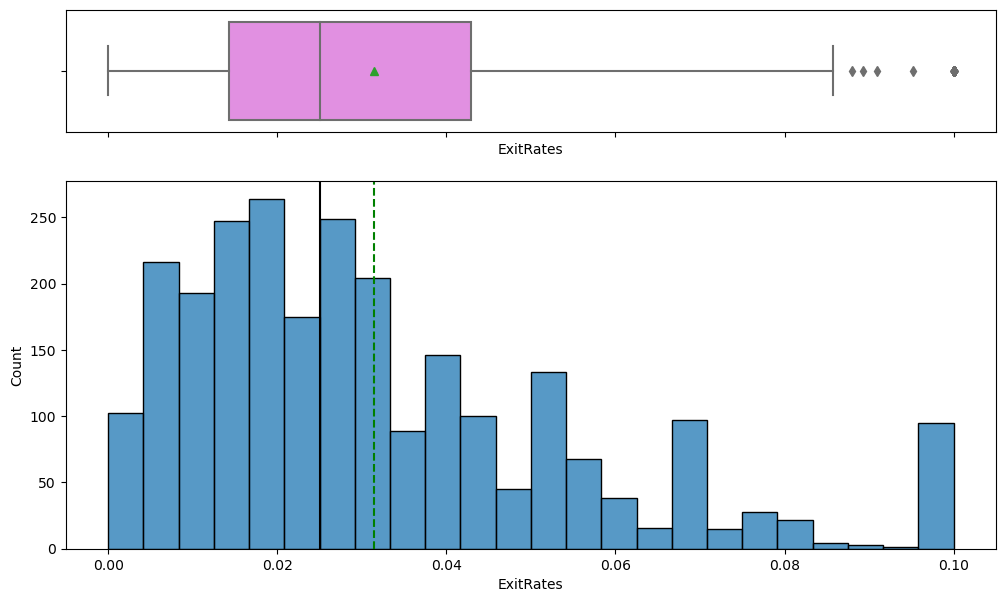

Boxplot and Histplot for  PageValues


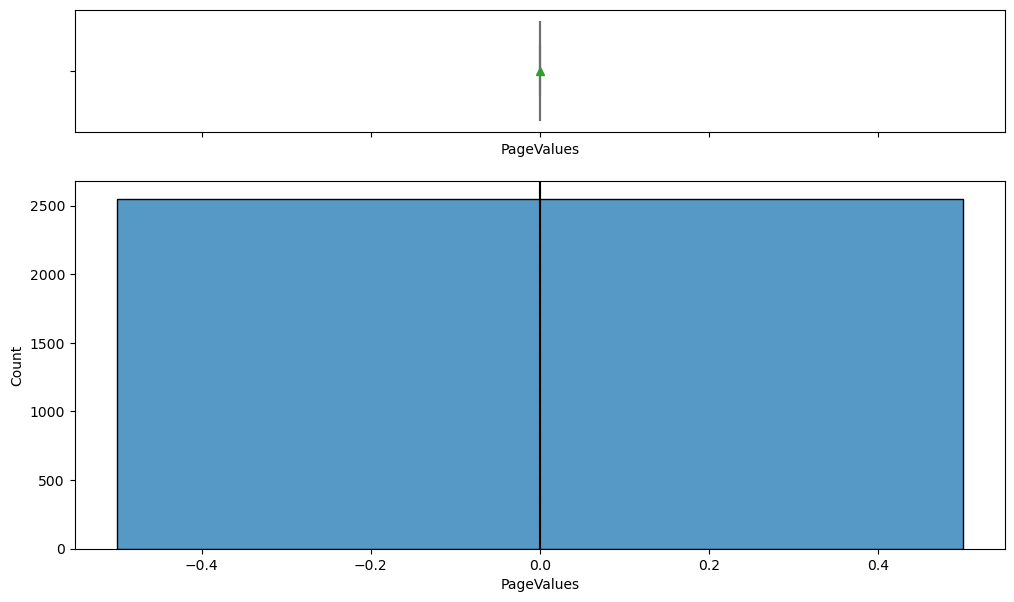

Boxplot and Histplot for  SpecialDay


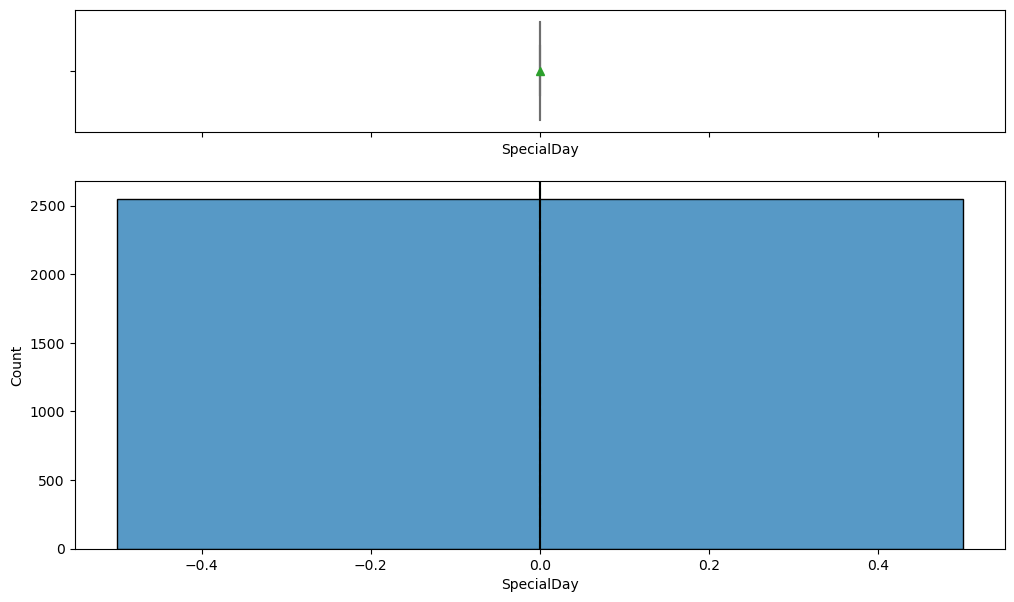

Boxplot and Histplot for  OperatingSystems


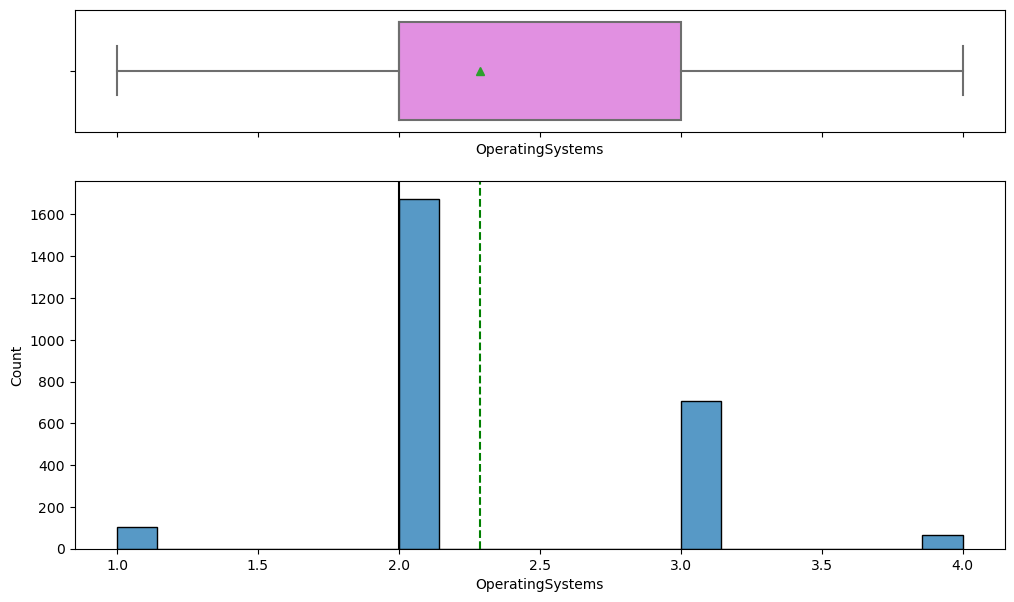

Boxplot and Histplot for  Browser


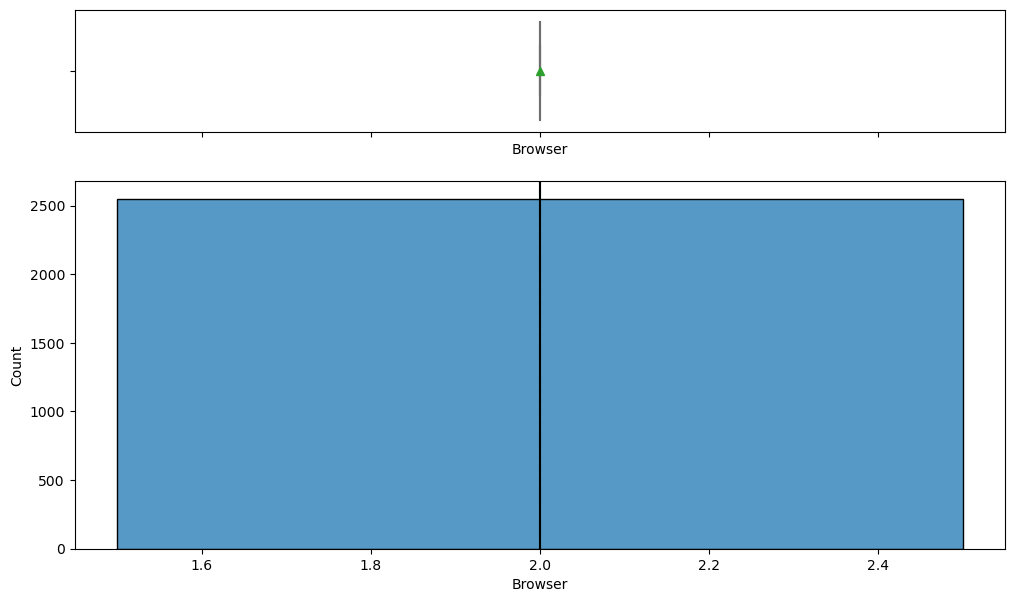

Boxplot and Histplot for  Region


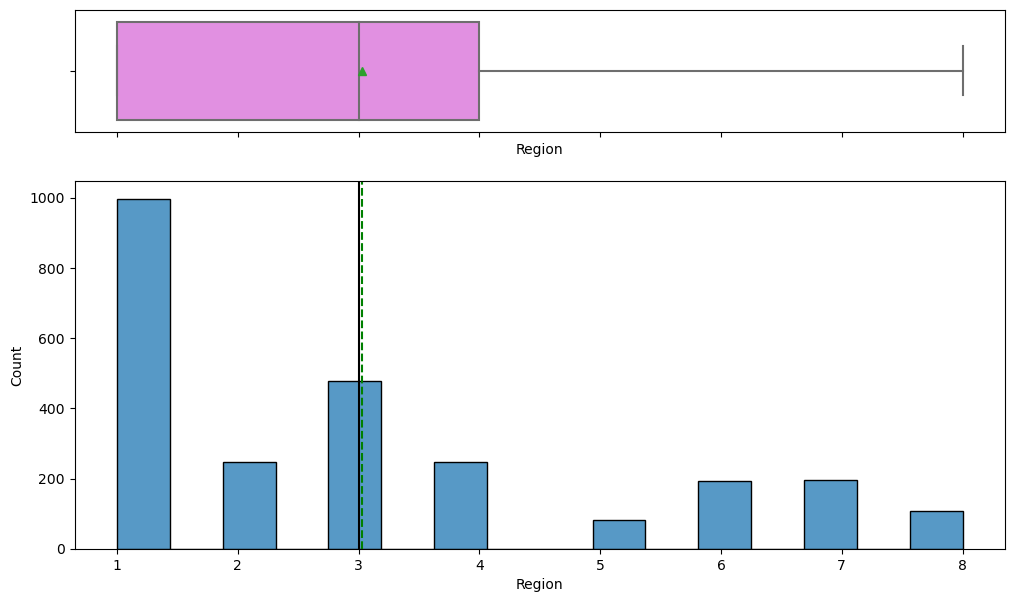

Boxplot and Histplot for  TrafficType


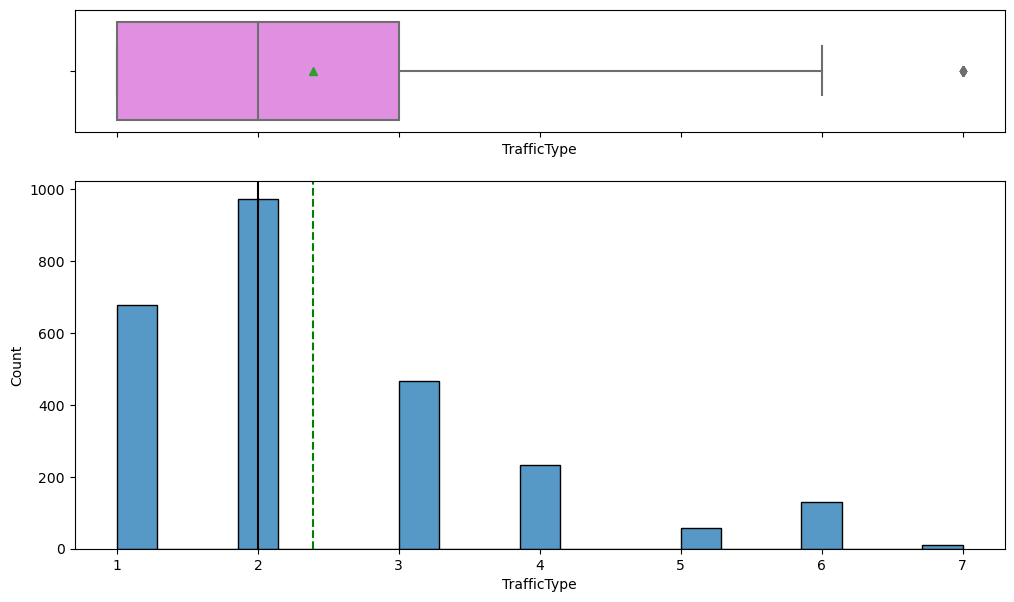

In [20]:
for col in df1.select_dtypes(exclude='O').columns:
    boxplot_histplot(df1, col)

#### 4.2 **Bivariate Analysis**
##### 4.2.1 category vs Numerical

In [21]:
def catnum(data, feature1, feature2):
    print("The Bivariate barchart between {0} and {1}".format(feature1, feature2))
    data.groupby(feature1)[feature2].mean().plot(kind='bar', color='orange')
    plt.show()

The Bivariate barchart between Purchase and Administrative


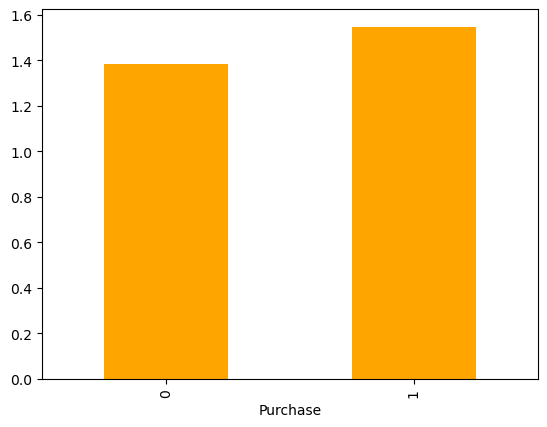

The Bivariate barchart between Purchase and Administrative_Duration


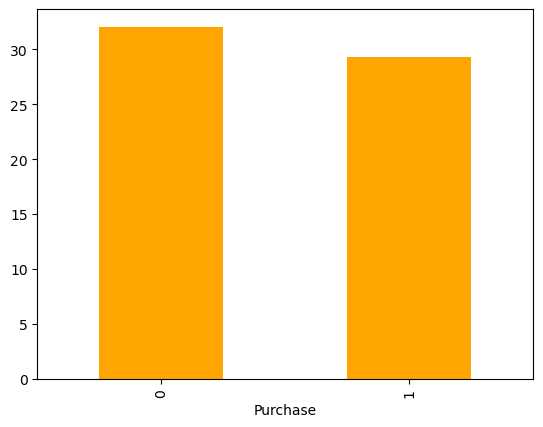

The Bivariate barchart between Purchase and Informational


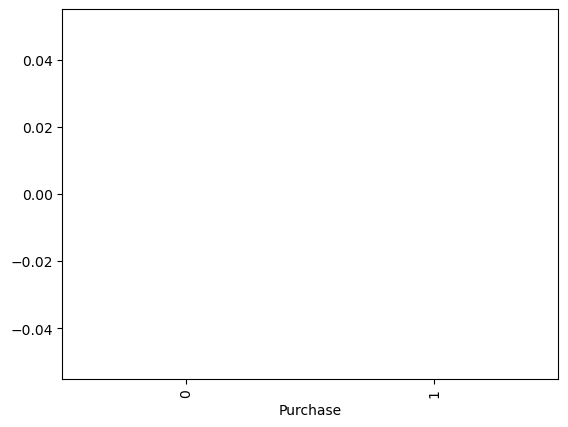

The Bivariate barchart between Purchase and Informational_Duration


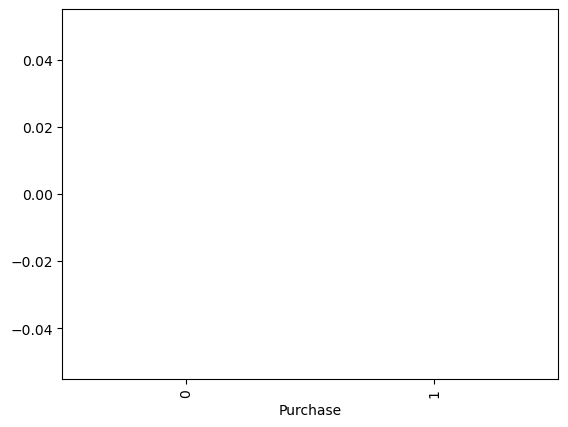

The Bivariate barchart between Purchase and ProductRelated


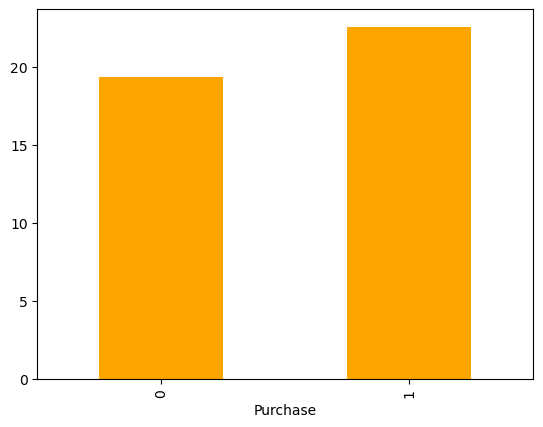

The Bivariate barchart between Purchase and ProductRelated_Duration


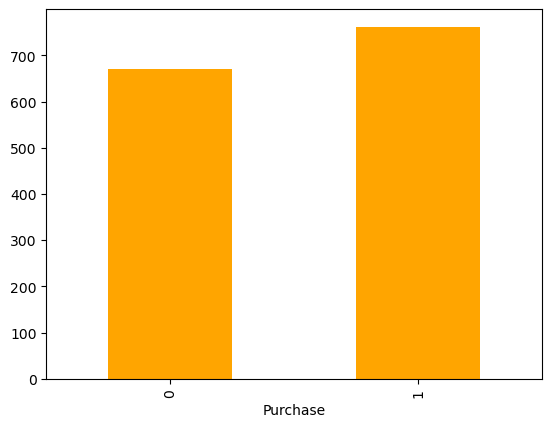

The Bivariate barchart between Purchase and BounceRates


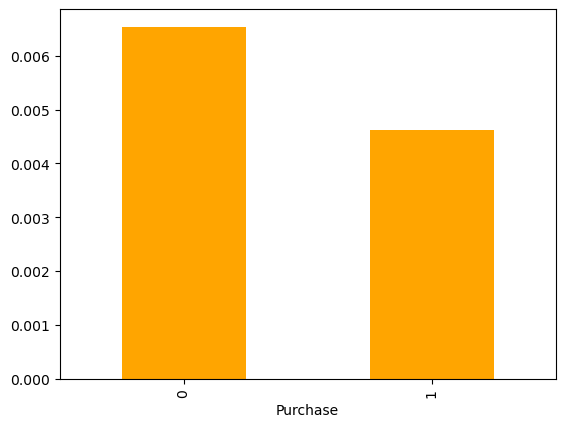

The Bivariate barchart between Purchase and ExitRates


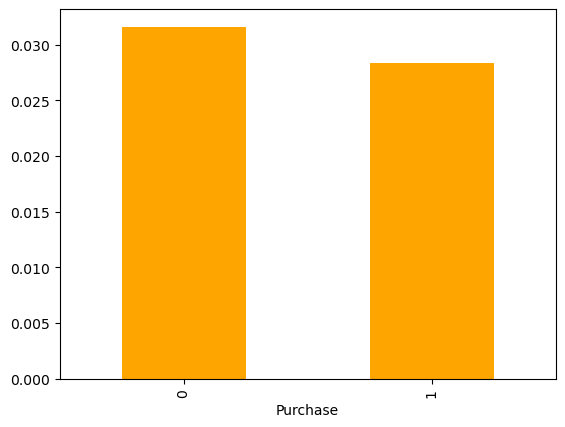

The Bivariate barchart between Purchase and PageValues


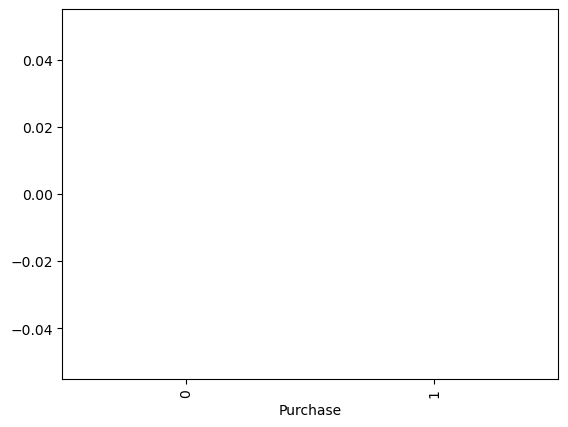

The Bivariate barchart between Purchase and SpecialDay


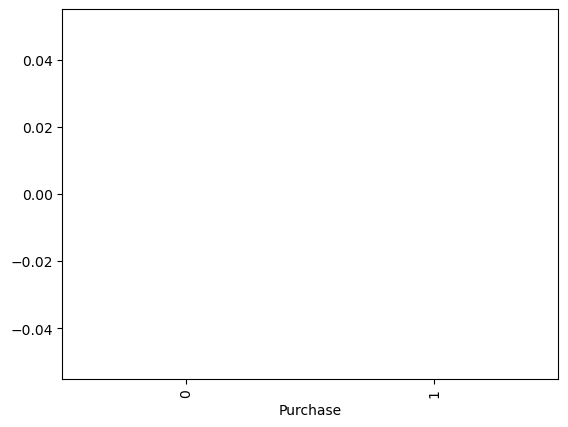

The Bivariate barchart between Purchase and OperatingSystems


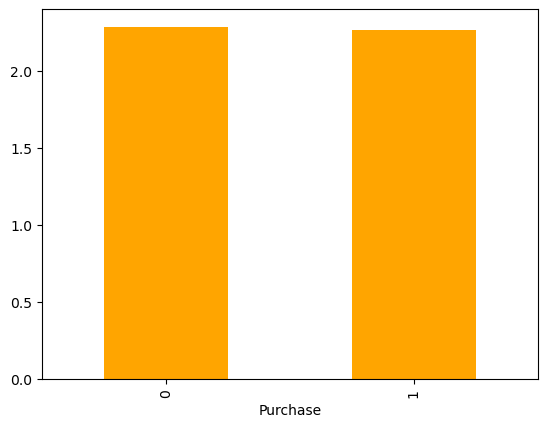

The Bivariate barchart between Purchase and Browser


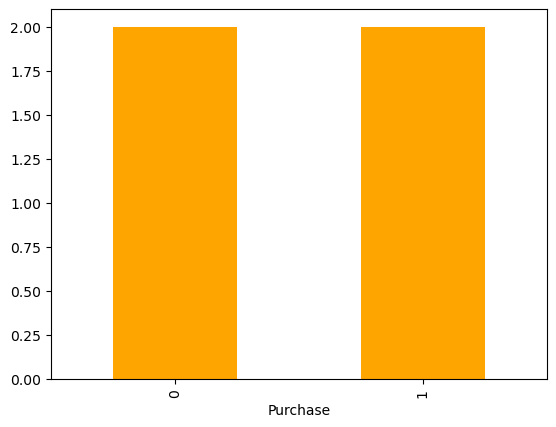

The Bivariate barchart between Purchase and Region


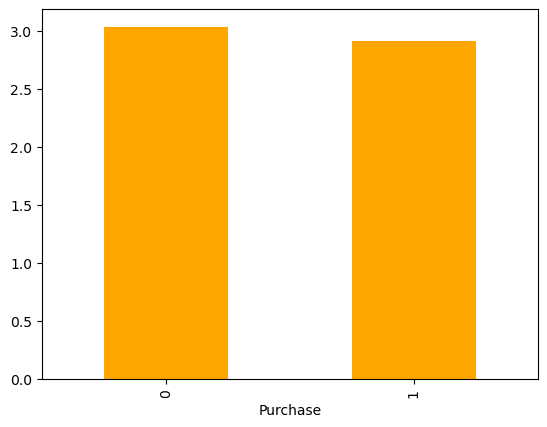

The Bivariate barchart between Purchase and TrafficType


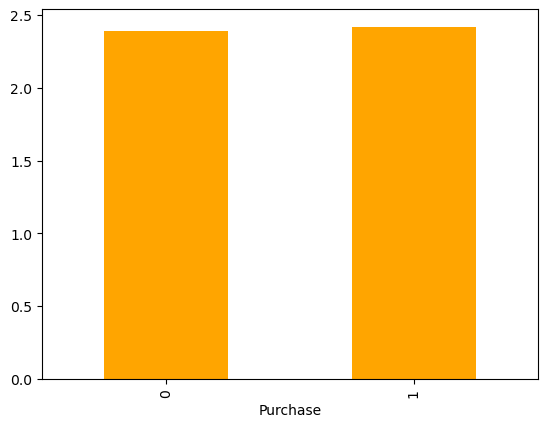

In [22]:
for col in df1.select_dtypes(exclude='O').columns:
    catnum(df1,'Purchase' ,col)

In [23]:
def lineplot_scatterplot(data, feature1, feature2):
    plt.figure(figsize=(16,7))
    print("Bivariates between {0} and {1}".format(feature1, feature2))
    plt.subplot(1,2,1)
    sns.lineplot(data=data, x=feature1, y=feature2, color='green')
    plt.title('Lineplot')
    plt.subplot(1,2,2)
    sns.scatterplot(data=data, x=feature1, y=feature2, color='blue')
    plt.title('Scatterplot')
    plt.show()
    

Bivariates between Region and Administrative


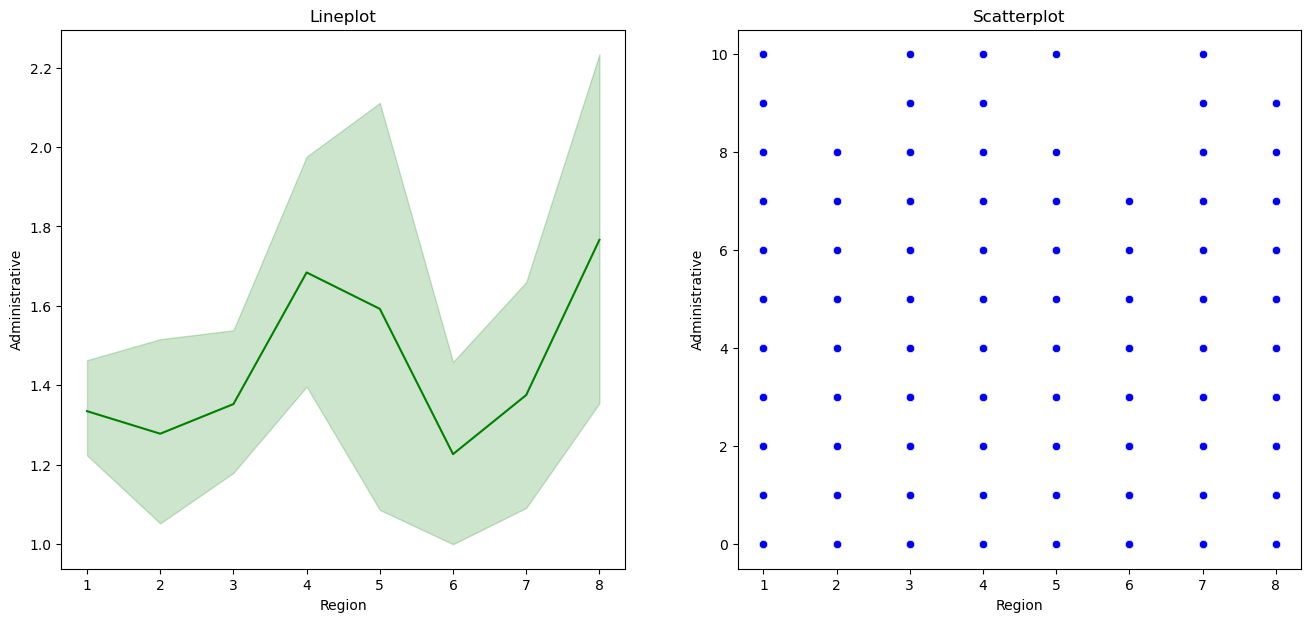

Bivariates between Region and Administrative_Duration


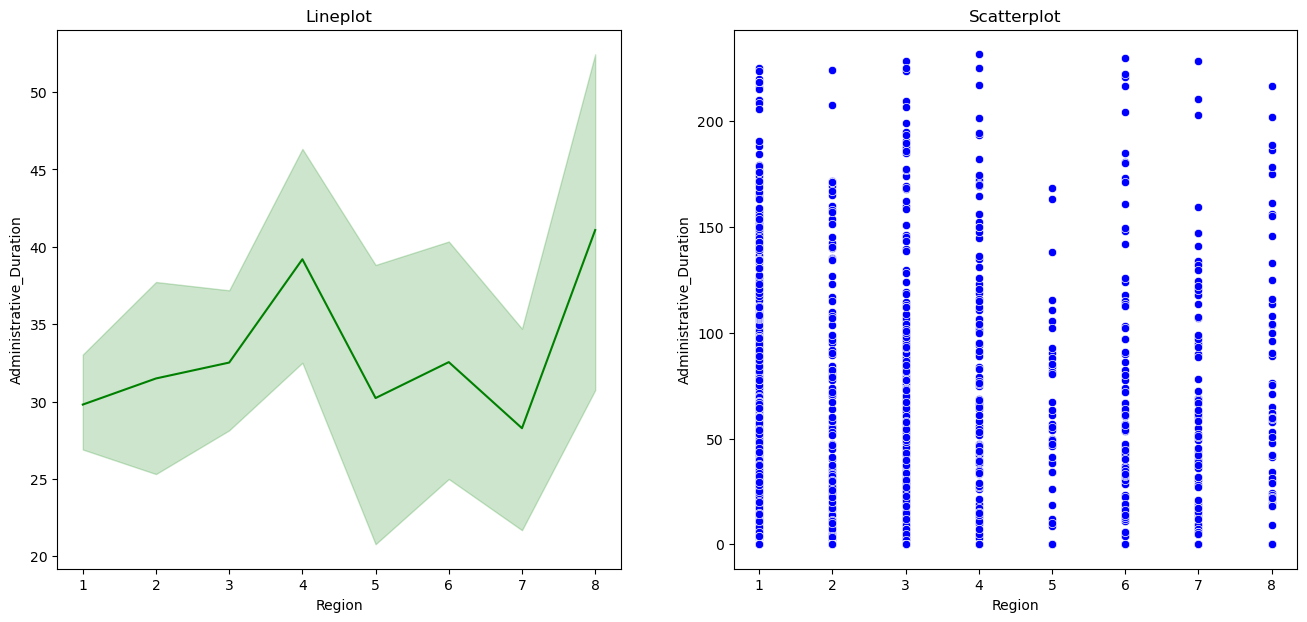

Bivariates between Region and Informational


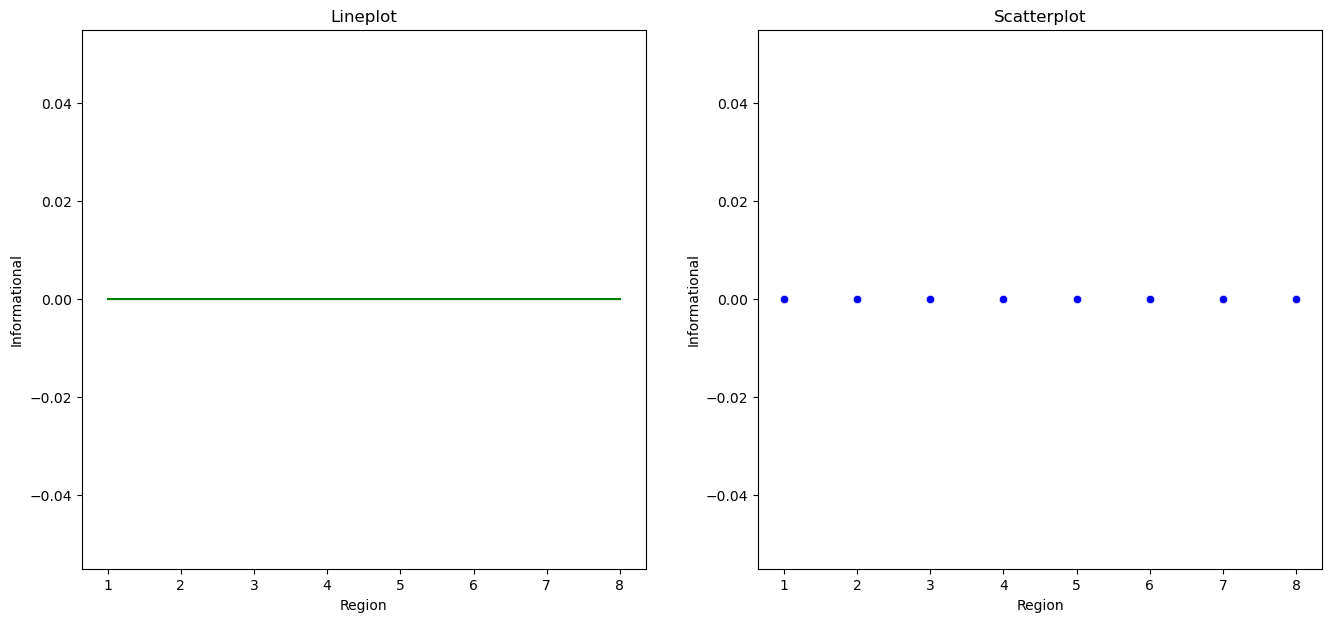

Bivariates between Region and Informational_Duration


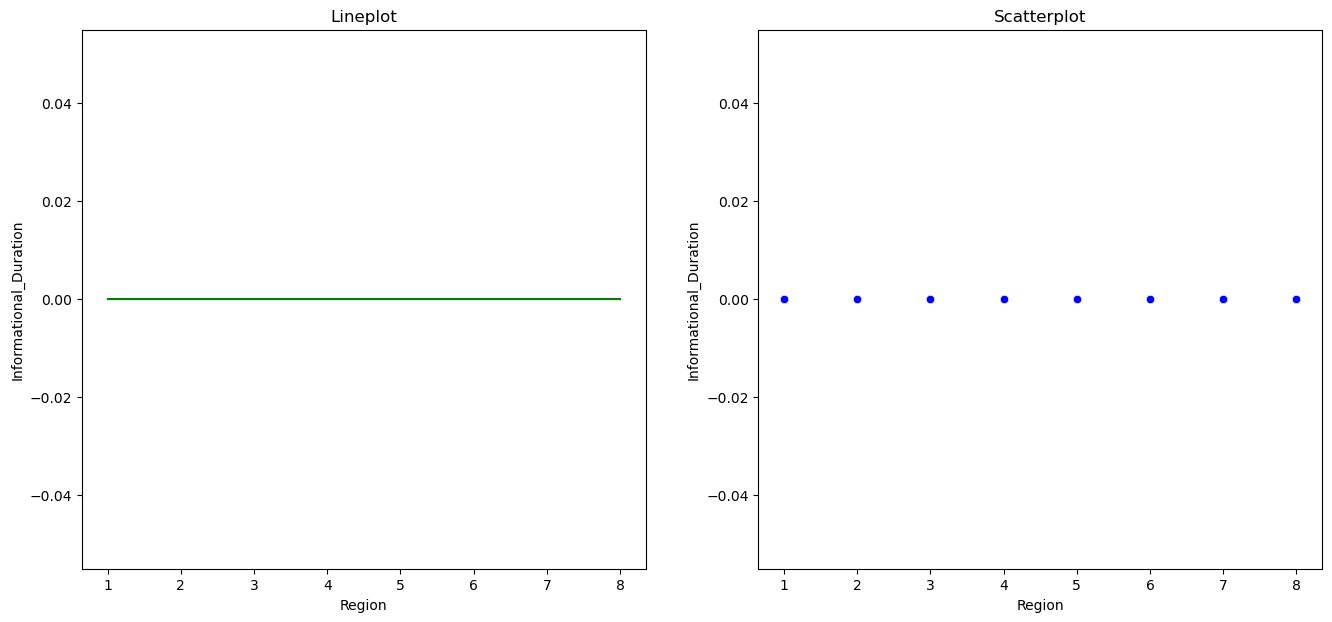

Bivariates between Region and ProductRelated


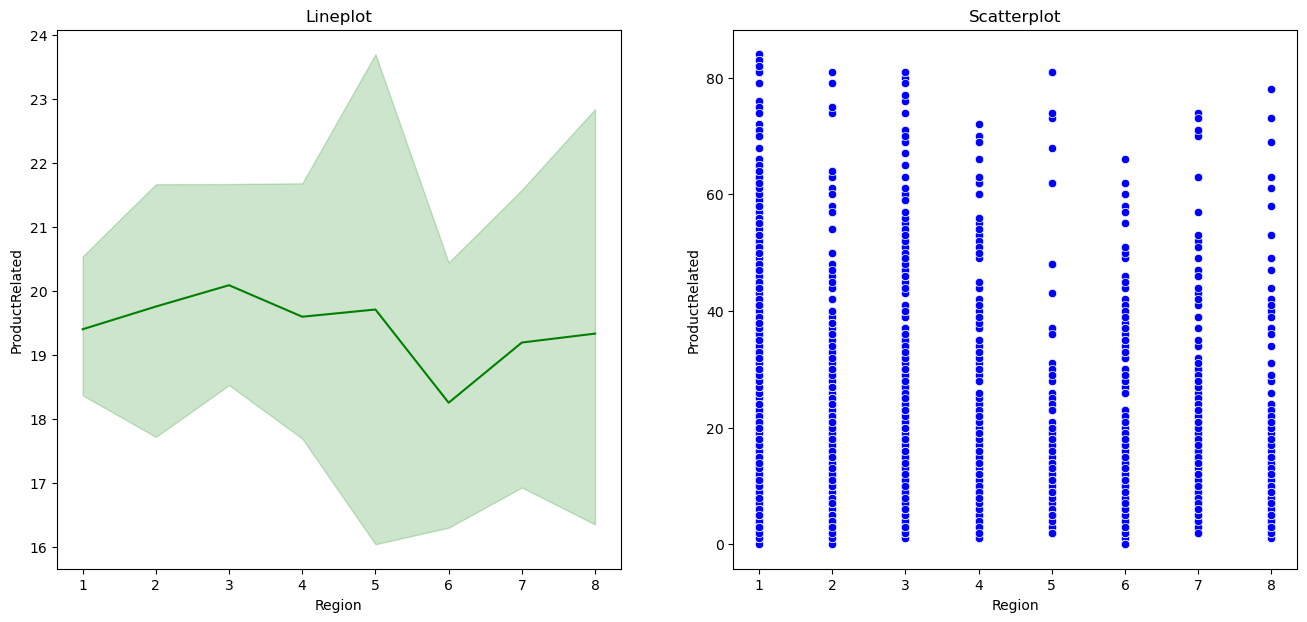

Bivariates between Region and ProductRelated_Duration


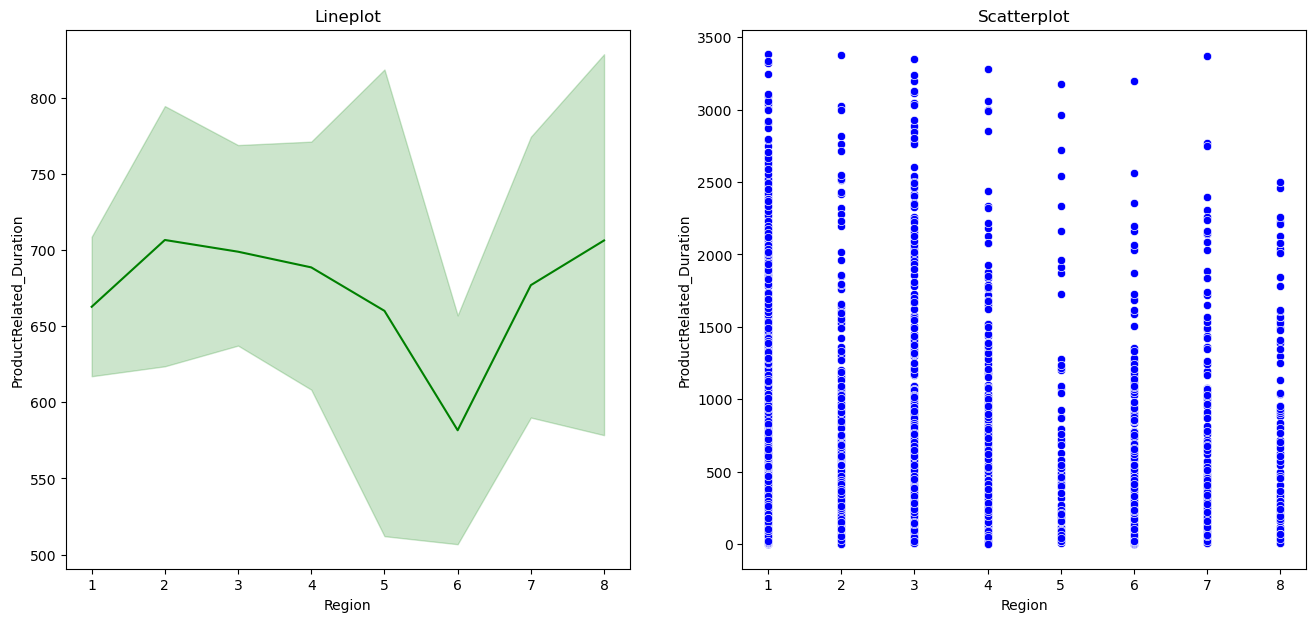

Bivariates between Region and BounceRates


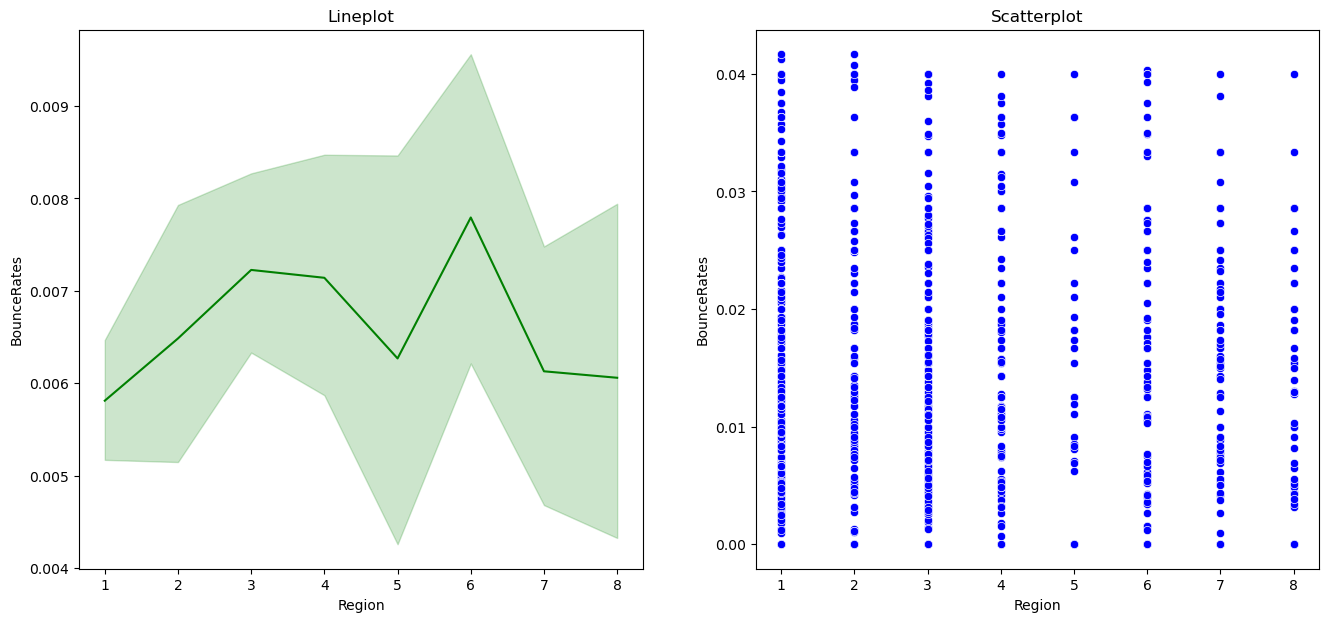

Bivariates between Region and ExitRates


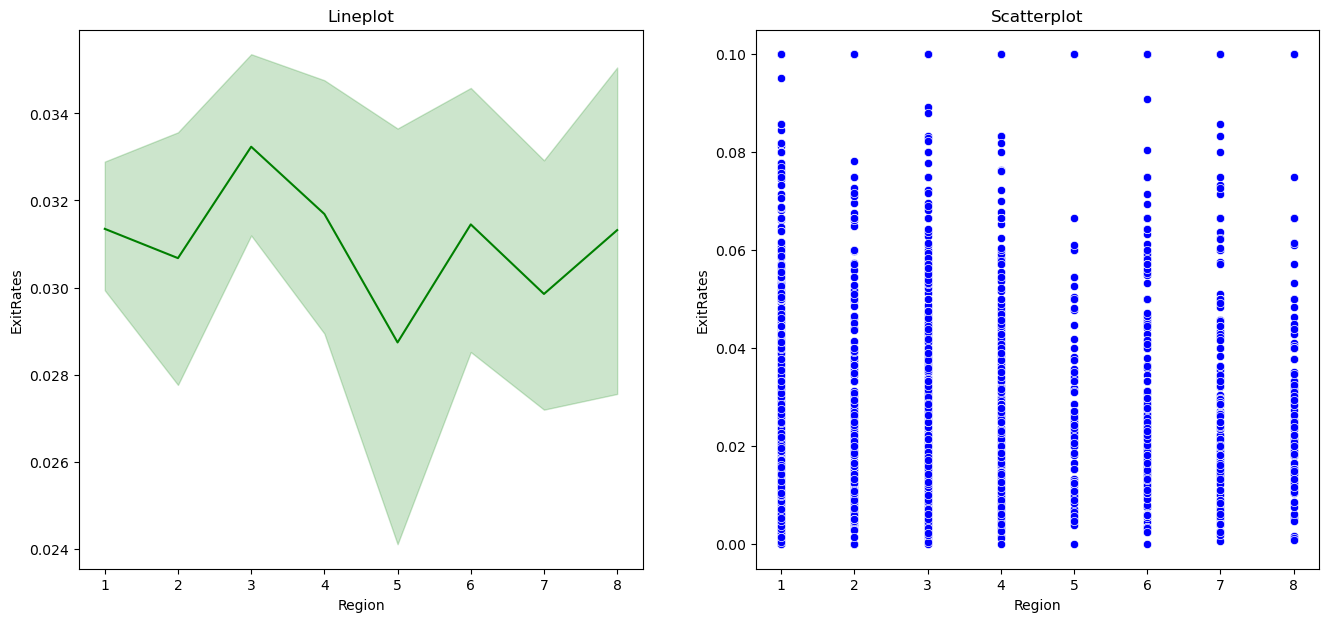

Bivariates between Region and PageValues


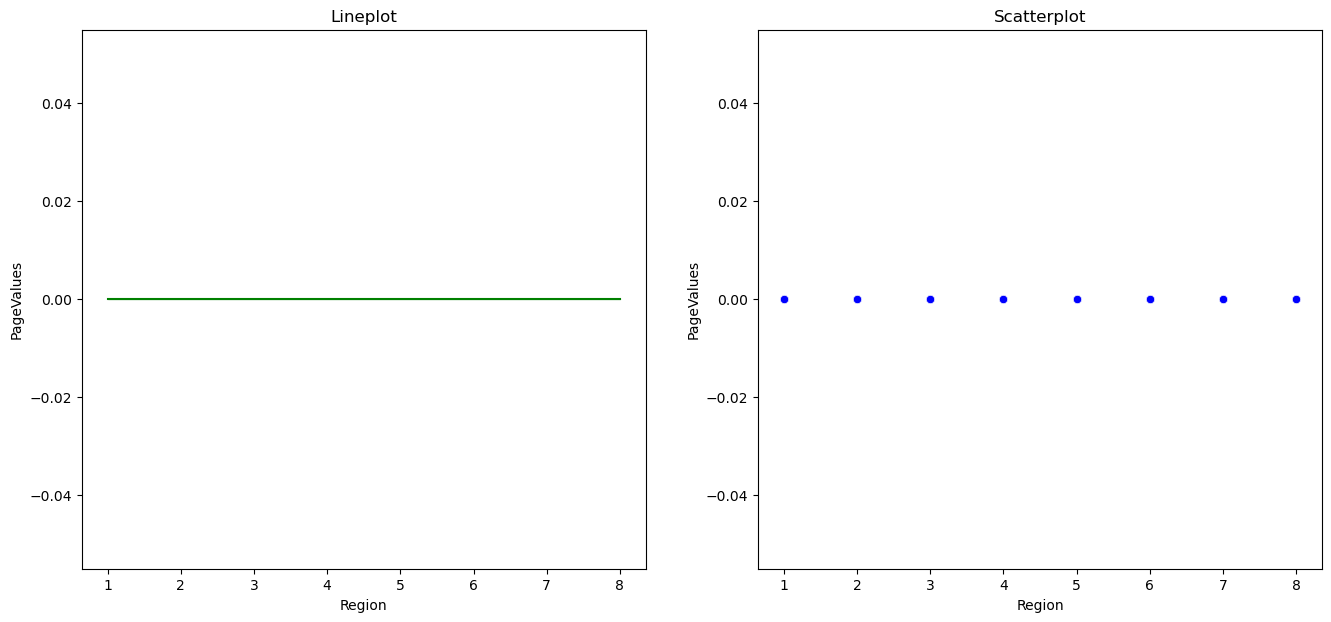

Bivariates between Region and SpecialDay


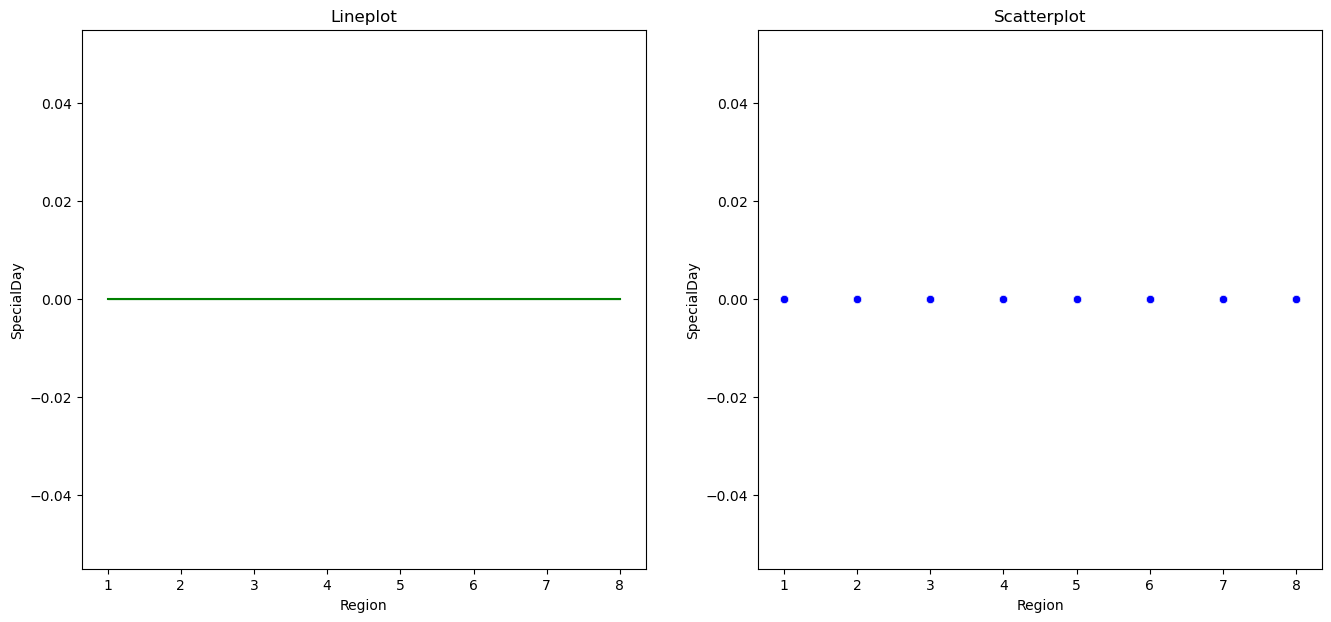

Bivariates between Region and OperatingSystems


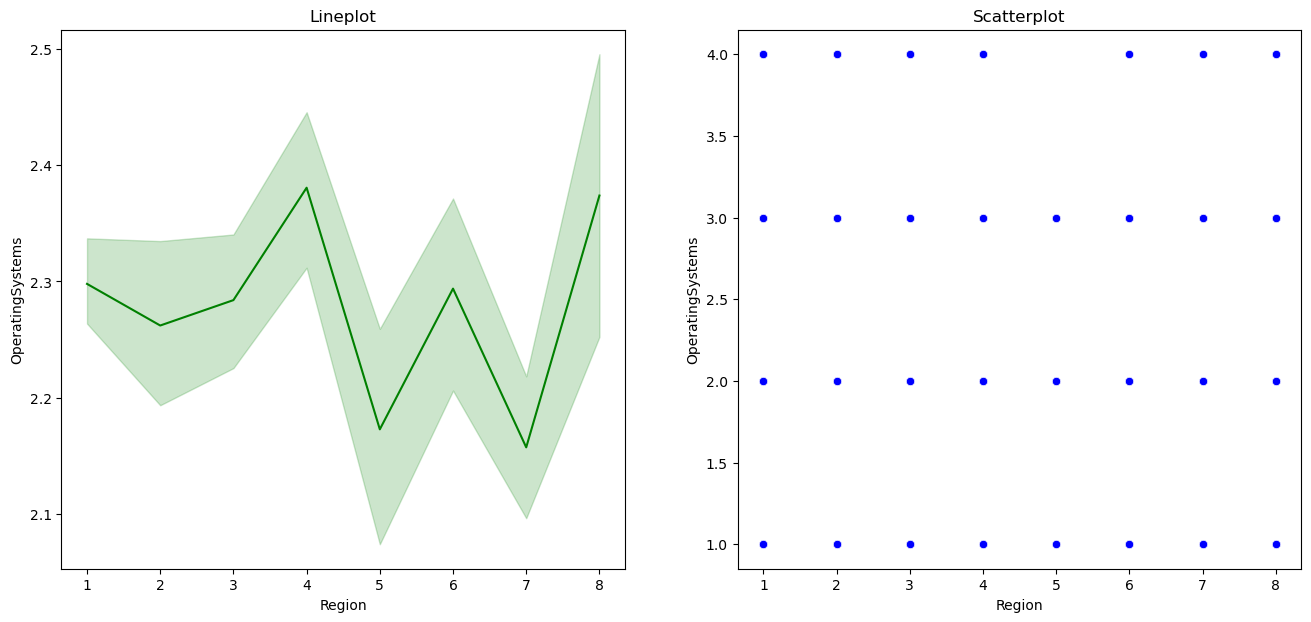

Bivariates between Region and Browser


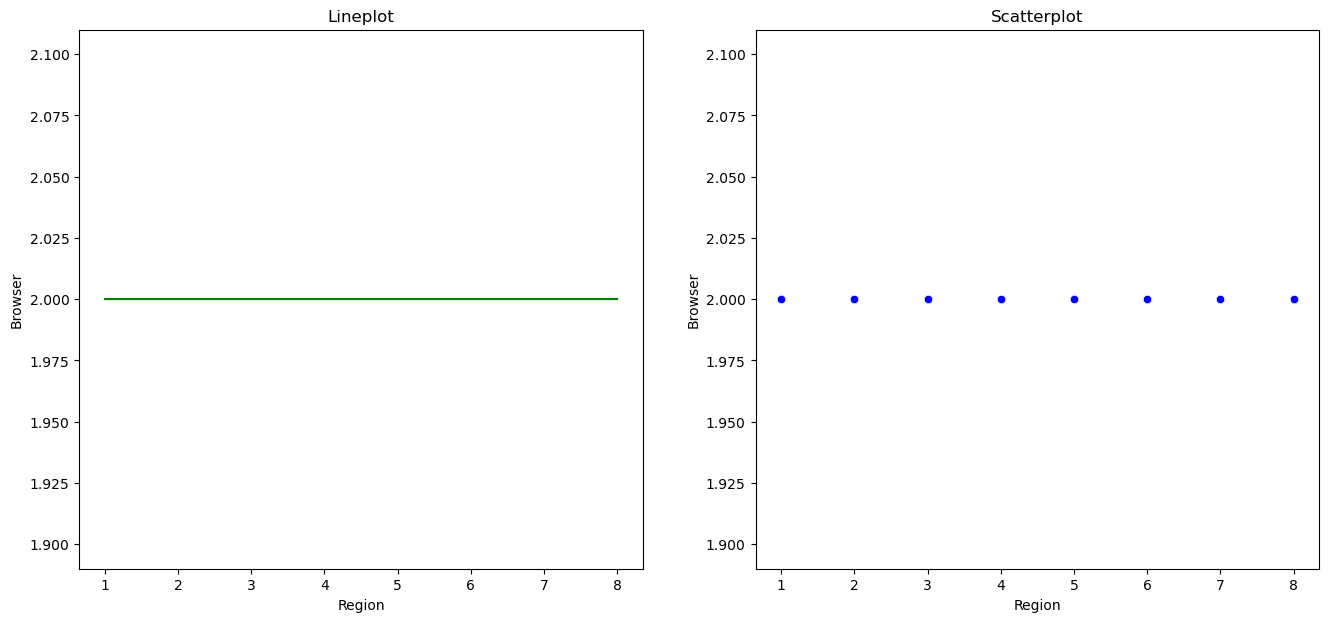

Bivariates between Region and Region


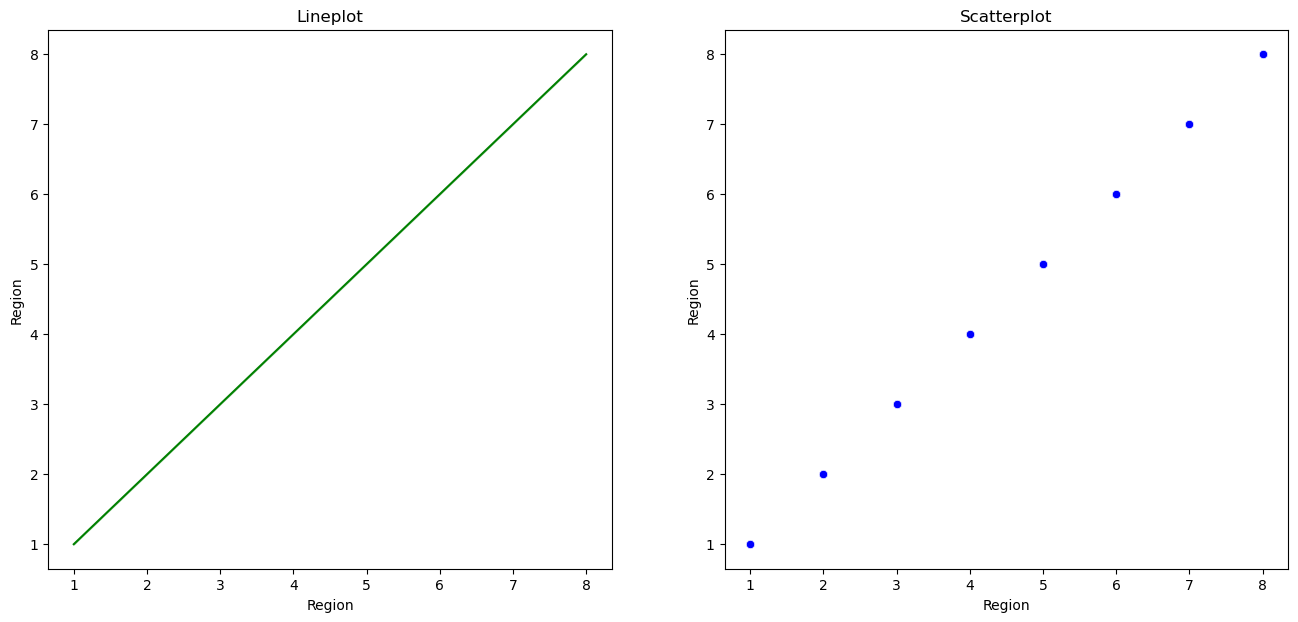

Bivariates between Region and TrafficType


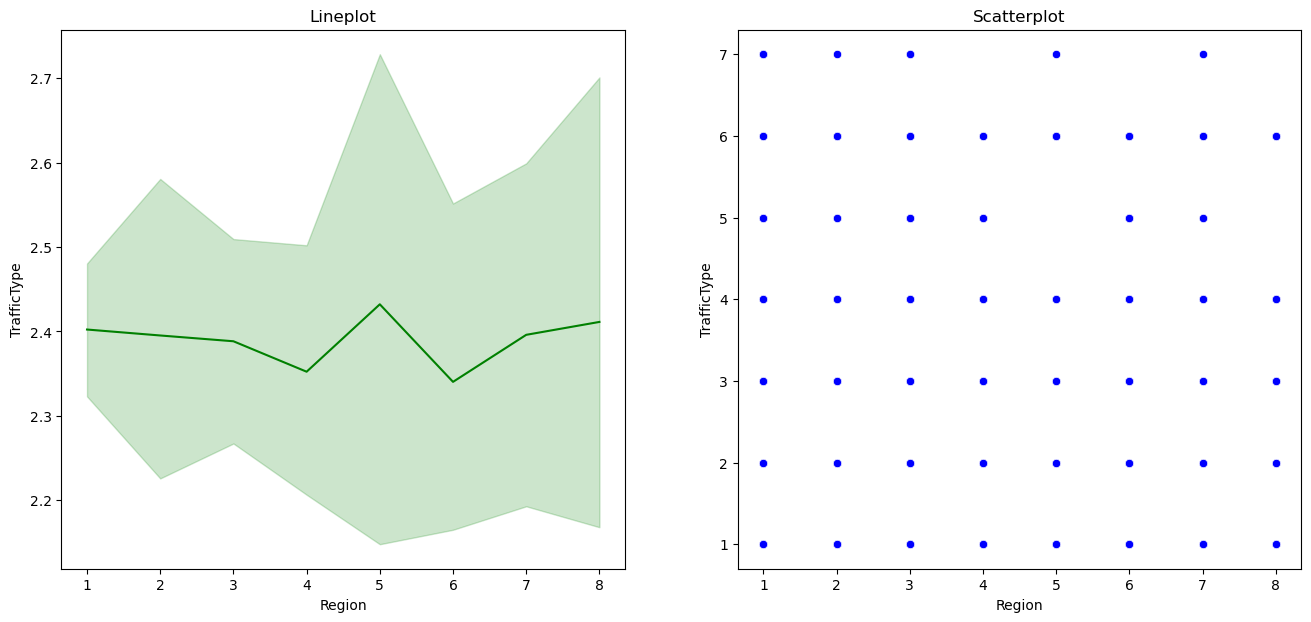

In [24]:
for col in df1.select_dtypes(exclude='O').columns:
    lineplot_scatterplot(data=df1,feature1='Region', feature2=col)

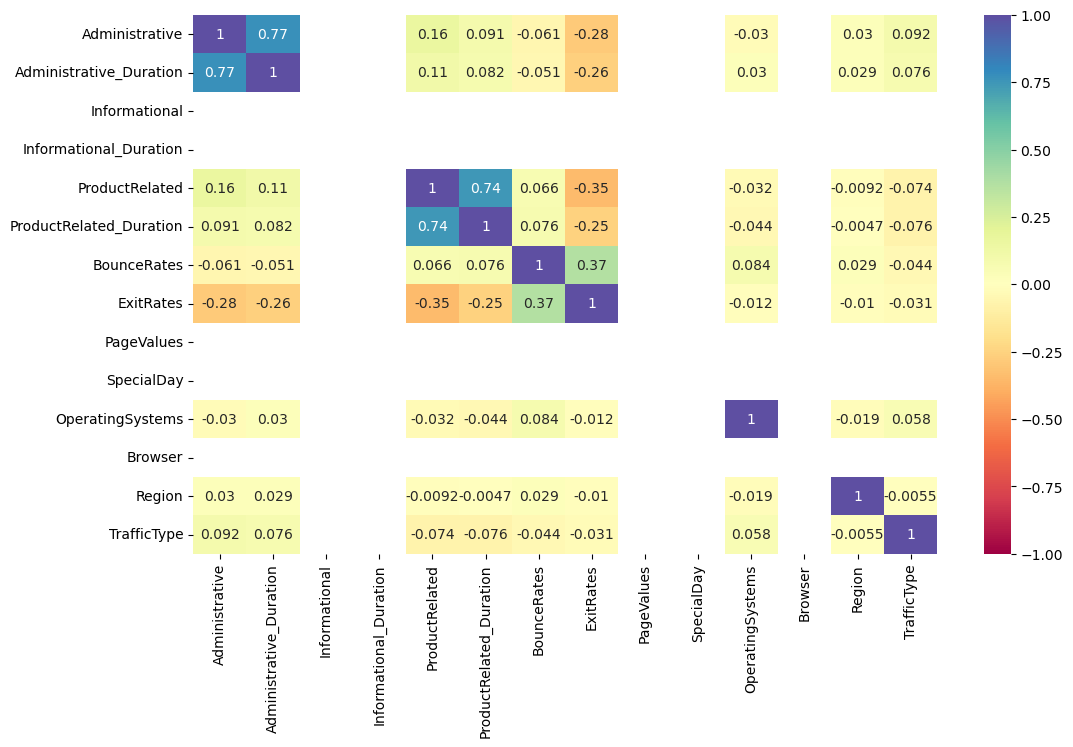

In [25]:
plt.figure(figsize=(12,7))
sns.heatmap(df1.corr(), cmap='Spectral', vmax=+1, vmin=-1, annot=True)
plt.show()

#### Step 5:- Feature Engineering

In [26]:
df1["Total Number of Interactions"]=df1['Administrative'] + df1['Informational'] + df1['ProductRelated']
page_values_weight = 0.7
bounce_rates_weight = 0.2
exit_rates_weight = 0.1

# Create a new column 'PageEngagementScore' using the defined formula
df1['PageEngagementScore'] = (
    page_values_weight * df1['PageValues']
    - bounce_rates_weight * df1['BounceRates']
    - exit_rates_weight * df1['ExitRates']
)
df1["Total Duration Spent"]=df1['Administrative_Duration'] + df1['Informational_Duration'] + df1['ProductRelated_Duration']

In [27]:
df1.drop(["Administrative","Informational","ProductRelated",'Informational_Duration','ProductRelated_Duration','PageValues','BounceRates','ExitRates'],axis=1,inplace=True)

In [28]:
df1.head()

,Administrative_Duration,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Purchase,Total Number of Interactions,PageEngagementScore,Total Duration Spent
1,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,0,2,-0.010000,64.000000
5,0.0,0.0,Feb,2,2,1,3,Returning_Visitor,False,0,19,-0.005614,154.216667
14,0.0,0.0,Feb,3,2,3,3,Returning_Visitor,False,0,2,-0.010000,68.000000
18,0.0,0.0,Feb,2,2,1,3,Returning_Visitor,False,0,2,-0.010000,32.000000
22,0.0,0.0,Feb,3,2,1,5,Returning_Visitor,False,0,3,-0.003333,105.000000


##### 5.1 Dummy Encode the Categorical Variables

In [29]:
x=df1.drop("Purchase",axis=1)
y=df1["Purchase"]

In [30]:
y=y.astype("int64")

In [31]:
df_num=x.select_dtypes(include=np.number)
df_cat=x.select_dtypes(include=object)

In [32]:
dummy_var = pd.get_dummies(data = df_cat, drop_first = True)

In [33]:
dummy_var.reset_index(inplace=True)

In [34]:
dummy_var.drop("index",axis=1,inplace=True)

##### 5.2 Scale the data

In [35]:
X_scaler = StandardScaler()
num_scaled = X_scaler.fit_transform(df_num)
df_num_scaled = pd.DataFrame(num_scaled, columns = df_num.columns)

In [36]:
X = pd.concat([df_num_scaled, dummy_var], axis = 1)
X.head()

,Administrative_Duration,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Total Number of Interactions,PageEngagementScore,Total Duration Spent,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_Other,VisitorType_Returning_Visitor,Weekend_True
0,-0.632354,0.0,-0.496020,0.0,-0.920585,-0.293314,-1.104179,-1.526352,-0.922828,0,1,0,0,0,0,0,0,0,0,1,0
1,-0.632354,0.0,-0.496020,0.0,-0.920585,0.458395,-0.109392,-0.321852,-0.792949,0,1,0,0,0,0,0,0,0,0,1,0
2,-0.632354,0.0,1.227211,0.0,-0.012816,0.458395,-1.104179,-1.526352,-0.917069,0,1,0,0,0,0,0,0,0,0,1,0
3,-0.632354,0.0,-0.496020,0.0,-0.920585,0.458395,-1.104179,-1.526352,-0.968896,0,1,0,0,0,0,0,0,0,0,1,0
4,-0.632354,0.0,1.227211,0.0,-0.920585,1.961811,-1.045663,0.304488,-0.863803,0,1,0,0,0,0,0,0,0,0,1,0


In [37]:
smt=SMOTE(random_state=42)
x,y=smt.fit_resample(X,y)

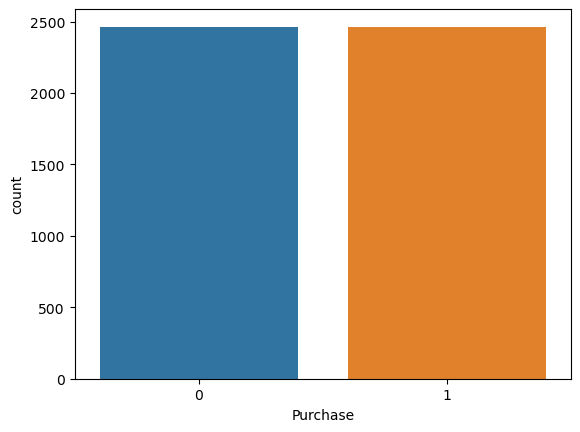

In [38]:
sns.countplot(y)
plt.show()

##### 5.3 Train-Test Split

In [39]:
Xc=sm.add_constant(x)

In [40]:
X_train,X_test,y_train,y_test=train_test_split(Xc,y,test_size=0.30,random_state=True)

In [41]:
print('X_train : ',X_train.shape)
print('y_train : ',y_train.shape)
print('X_test : ',X_test.shape)
print('y_test : ',y_test.shape)

X_train :  (3449, 22)
y_train :  (3449,)
X_test :  (1479, 22)
y_test :  (1479,)


In [42]:
vif=[variance_inflation_factor(Xc.values,i) for i in range(Xc.shape[1])]
pd.DataFrame(vif,index=Xc.columns,columns=['vif'])

,vif
const,6.742279
Administrative_Duration,1.126730
SpecialDay,NaN
OperatingSystems,1.122070
Browser,NaN
Region,1.036668
TrafficType,1.201052
Total Number of Interactions,3.358521
PageEngagementScore,1.163516
Total Duration Spent,3.151094


In [43]:
X_train,X_test,y_train,y_test=train_test_split(Xc.drop(["SpecialDay","Browser"],axis=1),y,test_size=0.30,random_state=True)

In [44]:
print('X_train : ',X_train.shape)
print('y_train : ',y_train.shape)
print('X_test : ',X_test.shape)
print('y_test : ',y_test.shape)

X_train :  (3449, 20)
y_train :  (3449,)
X_test :  (1479, 20)
y_test :  (1479,)


### Step 6:- Model Building

In [45]:
clfs = {
    "Logreg":LogisticRegression(),
    "KNN":KNeighborsClassifier(),
    "Navie Bayes":GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "AdaBoost":AdaBoostClassifier(),
    "GradientBoosting":GradientBoostingClassifier(),
    "XGboost":XGBClassifier()
}

models_report = pd.DataFrame(columns=["Model","Accuracy","Recall","Precision","F1"])


for clf,clf_name in list(zip(clfs.values(), clfs.keys())):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print("Fitting the model.....",clf_name)
    t = pd.Series({
        "Model":clf_name,
        "Accuracy":accuracy_score(y_test, y_pred),
        "Recall":recall_score(y_test, y_pred,average=None),
        "Precision":precision_score(y_test, y_pred,average='macro'),
        "F1":f1_score(y_test, y_pred,average='weighted')
        
    })
    models_report = models_report.append(t, ignore_index=True)   
models_report = models_report.sort_values(by="F1",ascending= False)
models_report

Fitting the model..... Logreg
Fitting the model..... KNN
Fitting the model..... Navie Bayes
Fitting the model..... Decision Tree
Fitting the model..... Random Forest
Fitting the model..... AdaBoost
Fitting the model..... GradientBoosting
Fitting the model..... XGboost


,Model,Accuracy,Recall,Precision,F1
7,XGboost,0.971602,"[0.9742198100407056, 0.9690026954177897]",0.971608,0.971602
4,Random Forest,0.971602,"[0.9579375848032564, 0.9851752021563343]",0.971988,0.971596
6,GradientBoosting,0.944557,"[0.9158751696065129, 0.9730458221024259]",0.946071,0.944507
3,Decision Tree,0.943881,"[0.9362279511533242, 0.9514824797843666]",0.943998,0.943876
5,AdaBoost,0.918188,"[0.8833107191316146, 0.9528301886792453]",0.920265,0.918081
1,KNN,0.887086,"[0.7747625508819539, 0.9986522911051213]",0.907615,0.885619
0,Logreg,0.846518,"[0.7869742198100407, 0.9056603773584906]",0.851461,0.845954
2,Navie Bayes,0.784990,"[0.6051560379918589, 0.9636118598382749]",0.826827,0.777771


#### 6.1 Logistic Regression (Full Model)

In [46]:
# use fit() to fit the logistic regression model
logreg = sm.Logit(y_train, X_train).fit()
model=logreg.summary()
model

         Current function value: 0.328632
         Iterations: 35


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Purchase   No. Observations:                 3449
Model:                          Logit   Df Residuals:                     3429
Method:                           MLE   Df Model:                           19
Date:                Sun, 30 Jul 2023   Pseudo R-squ.:                  0.5259
Time:                        13:22:34   Log-Likelihood:                -1133.5
converged:                      False   LL-Null:                       -2390.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                             3.7765      0.188     20.132      0.000       3.409       4.144
Administrative_Duration          -0.3782      0.067     -5.607      0.000      -0.510      -0.246
OperatingSystems                 -0.1183      0.059     -2.014      0.044      -0.234      -0.003
Region                           -0.0344      0.061     -0.563      0.573      -0.154       0.085
TrafficType                      -0.0667      0.073     -0.914      0.361      -0.210       0.076
Total Number of Interactions      0.2386      0.087      2.757      0.006       0.069       0.408
PageEngagementScore               0.2391      0.069      3.463      0.001       0.104       0.374
Total Duration Spent              0.0065      0.087      0.075      0.941      -0.163       0.176
Month_Dec                        -4.3237      0.216    -20.002      0.000      -4.747      -3.900
Month_Feb                       -25.1480   1.94e+04     -0.001      0.999   -3.81e+04    3.81e+04
Month_Jul                        -3.9906      0.324    -12.304      0.000      -4.626      -3.355
Month_June                       -5.9481      1.029     -5.778      0.000      -7.966      -3.931
Month_Mar                       -25.4930   4805.020     -0.005      0.996   -9443.160    9392.174
Month_May                       -27.4621   1.35e+04     -0.002      0.998   -2.64e+04    2.64e+04
Month_Nov                        -1.8735      0.172    -10.884      0.000      -2.211      -1.536
Month_Oct                        -4.5051      0.360    -12.502      0.000      -5.211      -3.799
Month_Sep                        -4.5722      0.345    -13.249      0.000      -5.249      -3.896
VisitorType_Other               -25.2111   5.42e+04     -0.000      1.000   -1.06e+05    1.06e+05
VisitorType_Returning_Visitor    -1.5611      0.141    -11.083      0.000      -1.837      -1.285
Weekend_True                     -0.4265      0.136     -3.131      0.002      -0.693      -0.160
=================================================================================================

Possibly complete quasi-separation: A fraction 0.23 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [47]:
logreg.pvalues[logreg.pvalues>0.05].index

Index(['Region', 'TrafficType', 'Total Duration Spent', 'Month_Feb',
       'Month_Mar', 'Month_May', 'VisitorType_Other'],
      dtype='object')

In [48]:
X_train,X_test,y_train,y_test=train_test_split(Xc.drop(['Region', 'TrafficType',"SpecialDay","Browser", 'Total Duration Spent', 'Month_Feb',
       'Month_Mar', 'Month_May', 'VisitorType_Other'],axis=1),y,test_size=0.30,random_state=True)

In [49]:
print('X_train : ',X_train.shape)
print('y_train : ',y_train.shape)
print('X_test : ',X_test.shape)
print('y_test : ',y_test.shape)

X_train :  (3449, 13)
y_train :  (3449,)
X_test :  (1479, 13)
y_test :  (1479,)


In [50]:
# use fit() to fit the logistic regression model
logreg = sm.Logit(y_train, X_train).fit()
model=logreg.summary()
model

Optimization terminated successfully.
         Current function value: 0.543226
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Purchase   No. Observations:                 3449
Model:                          Logit   Df Residuals:                     3436
Method:                           MLE   Df Model:                           12
Date:                Sun, 30 Jul 2023   Pseudo R-squ.:                  0.2163
Time:                        13:22:34   Log-Likelihood:                -1873.6
converged:                       True   LL-Null:                       -2390.7
Covariance Type:            nonrobust   LLR p-value:                8.505e-214
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                             1.2783      0.096     13.298      0.000       1.090       1.467
Administrative_Duration          -0.2114      0.050     -4.209      0.000      -0.310      -0.113
OperatingSystems                  0.1155      0.044      2.629      0.009       0.029       0.202
Total Number of Interactions      0.2377      0.042      5.680      0.000       0.156       0.320
PageEngagementScore               0.1611      0.049      3.302      0.001       0.065       0.257
Month_Dec                        -1.5902      0.156    -10.179      0.000      -1.896      -1.284
Month_Jul                        -1.3426      0.301     -4.467      0.000      -1.932      -0.754
Month_June                       -3.2269      1.028     -3.138      0.002      -5.242      -1.212
Month_Nov                         1.0588      0.094     11.275      0.000       0.875       1.243
Month_Oct                        -1.9499      0.339     -5.757      0.000      -2.614      -1.286
Month_Sep                        -1.8604      0.315     -5.903      0.000      -2.478      -1.243
VisitorType_Returning_Visitor    -1.8876      0.102    -18.576      0.000      -2.087      -1.688
Weekend_True                     -0.6826      0.106     -6.415      0.000      -0.891      -0.474
=================================================================================================
"""

In [51]:
print('AIC:', logreg.aic)

AIC: 3773.1705508656696


#### Preductions on test set

In [52]:
# let 'y_pred_prob' be the predicted values of y
y_pred_prob = logreg.predict(X_test)

# print the y_pred_prob
y_pred_prob.head()

3842    0.644126
3376    0.746441
2927    0.397116
1727    0.925669
771     0.253149
dtype: float64

In [53]:
# convert probabilities to 0 and 1 using 'if_else'
y_pred = [ 0 if x < 0.5 else 1 for x in y_pred_prob]

In [54]:
def print_metrics(y_test,y_pred):
    print("classification_report",classification_report(y_test,y_pred))
    print("roc score",roc_auc_score(y_test,y_pred))
    print('accuracy',accuracy_score(y_test,y_pred))
    print("precision",precision_score(y_test,y_pred))
    print("recall",recall_score(y_test,y_pred))
    print("f1score",f1_score(y_test,y_pred))

In [55]:
print_metrics(y_test,y_pred)

classification_report               precision    recall  f1-score   support

           0       0.72      0.74      0.73       737
           1       0.74      0.72      0.73       742

    accuracy                           0.73      1479
   macro avg       0.73      0.73      0.73      1479
weighted avg       0.73      0.73      0.73      1479

roc score 0.7295804730330218
accuracy 0.7295469912102772
precision 0.7355371900826446
recall 0.7196765498652291
f1score 0.7275204359673024


In [56]:
X_test.shape

(1479, 13)

In [57]:
y_test.shape

(1479,)

#### 6.1.1 Plot the confusion matrix.

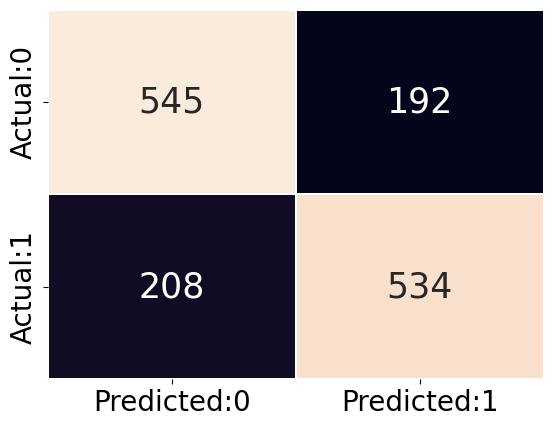

In [58]:
cm = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

sns.heatmap(conf_matrix, annot = True, fmt = 'd', cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})

plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
# display the plot
plt.show()

In [59]:
# compute the kappa value
kappa = cohen_kappa_score(y_test, y_pred)

# print the kappa value
print('kappa value:',kappa)

kappa value: 0.459127362889335


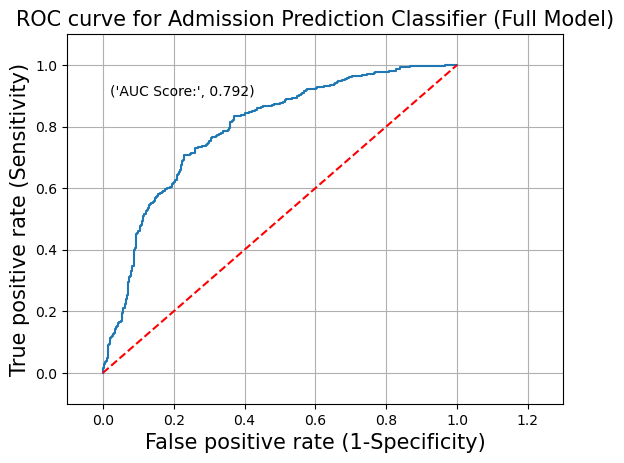

In [60]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# plot the ROC curve
plt.plot(fpr, tpr)

# set limits for x and y axes
plt.xlim([-0.1, 1.3])
plt.ylim([-0.1, 1.1])

# plot the straight line showing worst prediction for the model
plt.plot([0, 1], [0,1],'r--')

# add plot and axes labels
# set text size using 'fontsize'
plt.title('ROC curve for Admission Prediction Classifier (Full Model)', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

# add the AUC score to the plot
# 'x' and 'y' gives position of the text
# 's' is the text 
# use round() to round-off the AUC score upto 4 digits
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(roc_auc_score(y_test, y_pred_prob),4)))
                               
# plot the grid
plt.grid(True)

##### <a id="cut_off"></a>
#### 6.1.2 Identify the Best Cut-off Value

In [61]:
# create an empty dataframe to store the scores for various algorithms
score_card = pd.DataFrame(columns=['Probability Cutoff', 'AUC Score', 'Precision Score', 'Recall Score',
                                       'Accuracy Score', 'Kappa Score', 'f1-score'])

# append the result table for all performance scores
# performance measures considered for model comparision are 'AUC Score', 'Precision Score', 'Recall Score','Accuracy Score',
# 'Kappa Score', and 'f1-score'
# compile the required information in a user defined function 
def update_score_card(model, cutoff):
    
    # let 'y_pred_prob' be the predicted values of y
    y_pred_prob = logreg.predict(X_test)

    # convert probabilities to 0 and 1 using 'if_else'
    y_pred = [ 0 if x < cutoff else 1 for x in y_pred_prob]
    
    # assign 'score_card' as global variable
    global score_card

    # append the results to the dataframe 'score_card'
    # 'ignore_index = True' do not consider the index labels
    score_card = score_card.append({'Probability Cutoff': cutoff,
                                    'AUC Score' : metrics.roc_auc_score(y_test, y_pred),
                                    'Precision Score': metrics.precision_score(y_test, y_pred),
                                    'Recall Score': metrics.recall_score(y_test, y_pred),
                                    'Accuracy Score': metrics.accuracy_score(y_test, y_pred),
                                    'Kappa Score':metrics.cohen_kappa_score(y_test, y_pred),
                                    'f1-score': metrics.f1_score(y_test, y_pred)}, 
                                    ignore_index = True)

In [62]:
# consider a list of values for cut-off
cutoff = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

# use the for loop to compute performance measures for each value of the cut-off
# call the update_score_card() to update the score card for each cut-off
# pass the model and cut-off value to the function
for value in cutoff:
    update_score_card(logreg, value)

In [63]:
# print the score card 
print('Score Card for Logistic regression:')

# sort the dataframe based on the probability cut-off values ascending order
# 'reset_index' resets the index of the dataframe
# 'drop = True' drops the previous index
score_card = score_card.sort_values('Probability Cutoff').reset_index(drop = True)

# color the cell in the columns 'AUC Score', 'Accuracy Score', 'Kappa Score', 'f1-score' having maximum values
# 'style.highlight_max' assigns color to the maximum value
# pass specified color to the parameter, 'color'
# pass the data to limit the color assignment to the parameter, 'subset' 
score_card.style.highlight_max(color = 'lightblue', subset = ['AUC Score', 'Accuracy Score', 'Kappa Score', 'f1-score'])

Score Card for Logistic regression:


,Probability Cutoff,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,0.100000,0.574650,0.542311,0.993261,0.576065,0.149722,0.701571
1,0.200000,0.624271,0.575563,0.964960,0.625423,0.249113,0.721047
2,0.300000,0.670573,0.616152,0.915094,0.671400,0.341708,0.736443
3,0.400000,0.717140,0.691943,0.787062,0.717377,0.434483,0.736444
4,0.500000,0.729580,0.735537,0.719677,0.729547,0.459127,0.727520
5,0.600000,0.705564,0.761986,0.599730,0.705206,0.410831,0.671192
6,0.700000,0.684944,0.816092,0.478437,0.684246,0.369370,0.603229
7,0.800000,0.574610,0.787565,0.204852,0.573360,0.148847,0.325134
8,0.900000,0.522861,0.803571,0.060647,0.521298,0.045579,0.112782


### 6.2 Descison Tree Classifier 

In [64]:
def print_metrics(y_test,y_pred):
    print("classification_report",classification_report(y_test,y_pred))
    print("roc score",roc_auc_score(y_test,y_pred))
    print('accuracy',accuracy_score(y_test,y_pred))
    print("precision",precision_score(y_test,y_pred))
    print("recall",recall_score(y_test,y_pred))
    print("f1score",f1_score(y_test,y_pred))

In [65]:
def plot_metrics(clf,x_test,y_test,model_name):
    print(plot_confusion_matrix(clf,X_test,y_test,display_labels=[0,1]))
    print(plot_roc_curve(clf,X_test,y_test))
    print(plot_precision_recall_curve(clf,X_test,y_test))

In [66]:
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred=dt.predict(X_test)

In [67]:
print_metrics(y_test,y_pred)

classification_report               precision    recall  f1-score   support

           0       0.89      0.87      0.88       737
           1       0.87      0.89      0.88       742

    accuracy                           0.88      1479
   macro avg       0.88      0.88      0.88      1479
weighted avg       0.88      0.88      0.88      1479

roc score 0.8816411693066156
accuracy 0.8816768086544963
precision 0.8745046235138706
recall 0.8921832884097035
f1score 0.8832555036691128


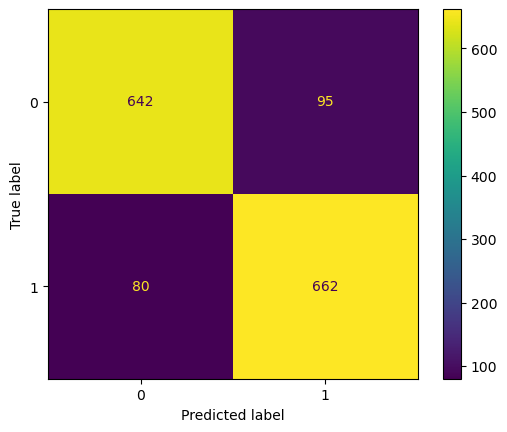

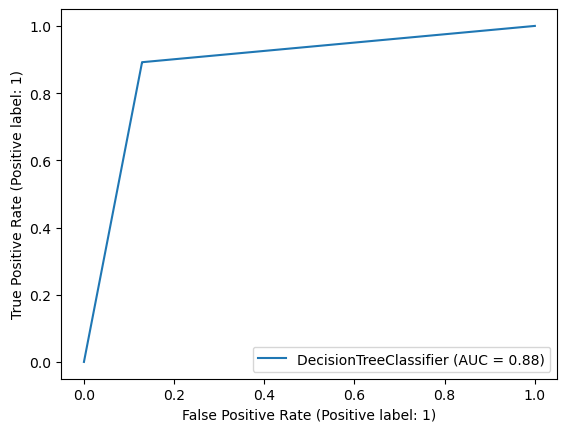

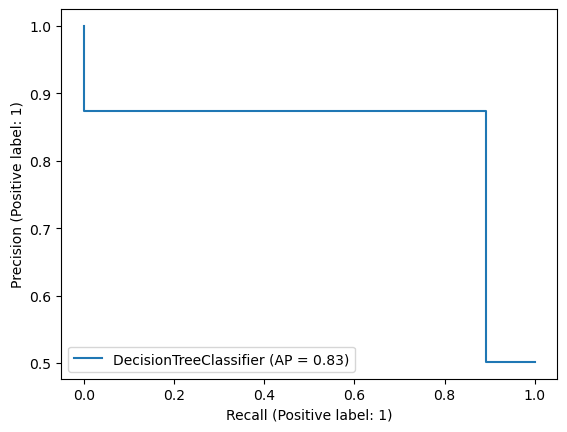

In [68]:
plot_metrics(dt,X_test,y_test,"dt")
plt.show()

In [69]:
# create an empty dataframe to store the scores for various algorithms
score_card = pd.DataFrame(columns=['Probability Cutoff', 'AUC Score', 'Precision Score', 'Recall Score',
                                       'Accuracy Score', 'Kappa Score', 'f1-score'])

# append the result table for all performance scores
# performance measures considered for model comparision are 'AUC Score', 'Precision Score', 'Recall Score','Accuracy Score',
# 'Kappa Score', and 'f1-score'
# compile the required information in a user defined function 
def update_score_card(model, cutoff):
    
    # let 'y_pred_prob' be the predicted values of y
    y_pred_prob = dt.predict(X_test)

    # convert probabilities to 0 and 1 using 'if_else'
    y_pred = [ 0 if x < cutoff else 1 for x in y_pred_prob]
    
    # assign 'score_card' as global variable
    global score_card

    # append the results to the dataframe 'score_card'
    # 'ignore_index = True' do not consider the index labels
    score_card = score_card.append({'Probability Cutoff': cutoff,
                                    'AUC Score' : metrics.roc_auc_score(y_test, y_pred),
                                    'Precision Score': metrics.precision_score(y_test, y_pred),
                                    'Recall Score': metrics.recall_score(y_test, y_pred),
                                    'Accuracy Score': metrics.accuracy_score(y_test, y_pred),
                                    'Kappa Score':metrics.cohen_kappa_score(y_test, y_pred),
                                    'f1-score': metrics.f1_score(y_test, y_pred)}, 
                                    ignore_index = True)

In [70]:
# consider a list of values for cut-off
cutoff = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

# use the for loop to compute performance measures for each value of the cut-off
# call the update_score_card() to update the score card for each cut-off
# pass the model and cut-off value to the function
for value in cutoff:
    update_score_card(dt, value)

In [71]:
# print the score card 
print('Score Card for descision Tree classification:')

# sort the dataframe based on the probability cut-off values ascending order
# 'reset_index' resets the index of the dataframe
# 'drop = True' drops the previous index
score_card = score_card.sort_values('Probability Cutoff').reset_index(drop = True)

# color the cell in the columns 'AUC Score', 'Accuracy Score', 'Kappa Score', 'f1-score' having maximum values
# 'style.highlight_max' assigns color to the maximum value
# pass specified color to the parameter, 'color'
# pass the data to limit the color assignment to the parameter, 'subset' 
score_card.style.highlight_max(color = 'lightblue', subset = ['AUC Score', 'Accuracy Score', 'Kappa Score', 'f1-score'])

Score Card for descision Tree classification:


,Probability Cutoff,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,0.100000,0.881641,0.874505,0.892183,0.881677,0.763335,0.883256
1,0.200000,0.881641,0.874505,0.892183,0.881677,0.763335,0.883256
2,0.300000,0.881641,0.874505,0.892183,0.881677,0.763335,0.883256
3,0.400000,0.881641,0.874505,0.892183,0.881677,0.763335,0.883256
4,0.500000,0.881641,0.874505,0.892183,0.881677,0.763335,0.883256
5,0.600000,0.881641,0.874505,0.892183,0.881677,0.763335,0.883256
6,0.700000,0.881641,0.874505,0.892183,0.881677,0.763335,0.883256
7,0.800000,0.881641,0.874505,0.892183,0.881677,0.763335,0.883256
8,0.900000,0.881641,0.874505,0.892183,0.881677,0.763335,0.883256


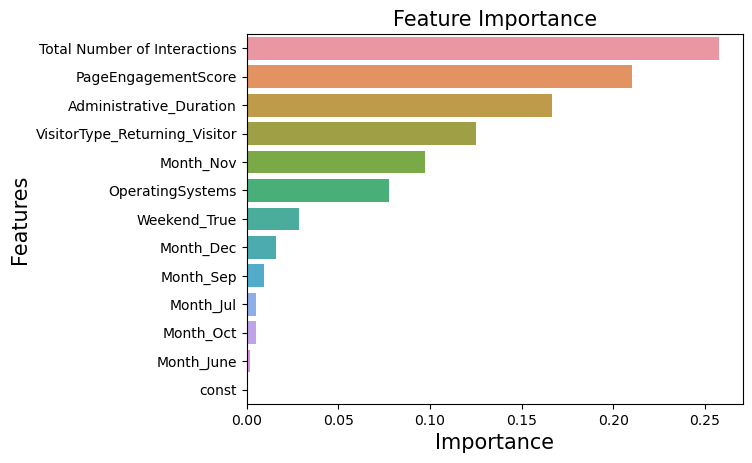

In [72]:
dt_important_features = pd.DataFrame({'Features': X_train.columns, 
                                   'Importance': dt.feature_importances_})

dt_important_features = dt_important_features.sort_values('Importance', ascending = False)

sns.barplot(x = 'Importance', y = 'Features', data = dt_important_features)

plt.title('Feature Importance', fontsize = 15)
plt.xlabel('Importance', fontsize = 15)
plt.ylabel('Features', fontsize = 15)

plt.show()

### 6.3 Random forest Classifier

In [78]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
print_metrics(y_test,y_pred)

classification_report               precision    recall  f1-score   support

           0       0.94      0.91      0.92       737
           1       0.91      0.94      0.92       742

    accuracy                           0.92      1479
   macro avg       0.92      0.92      0.92      1479
weighted avg       0.92      0.92      0.92      1479

roc score 0.9215128718085631
accuracy 0.9215686274509803
precision 0.9086161879895561
recall 0.9380053908355795
f1score 0.923076923076923


In [79]:
rfc_tuned = RandomForestClassifier(criterion= 'gini', max_depth= 5, max_features= 'log2', min_samples_leaf= 1, 
                                   min_samples_split= 4, n_estimators= 150)
rfc_tuned.fit(X_train, y_train)
y_pred= rfc_tuned.predict(X_test)
print_metrics(y_test, y_pred)

classification_report               precision    recall  f1-score   support

           0       0.82      0.82      0.82       737
           1       0.82      0.82      0.82       742

    accuracy                           0.82      1479
   macro avg       0.82      0.82      0.82      1479
weighted avg       0.82      0.82      0.82      1479

roc score 0.8194682675814752
accuracy 0.8194726166328601
precision 0.819650067294751
recall 0.8207547169811321
f1score 0.8202020202020203


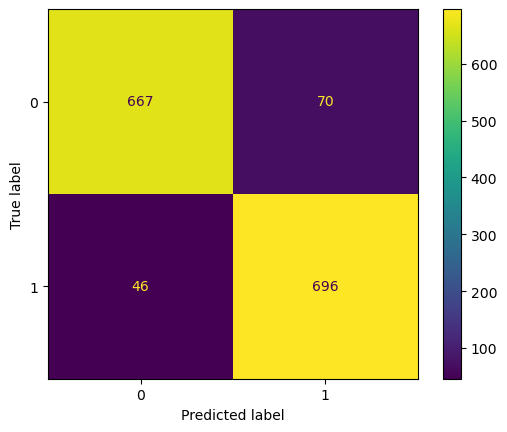

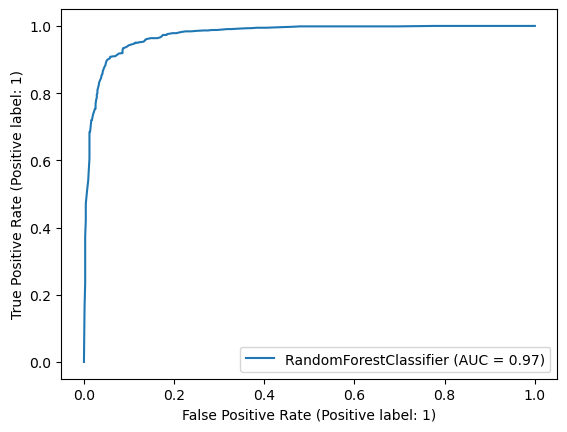

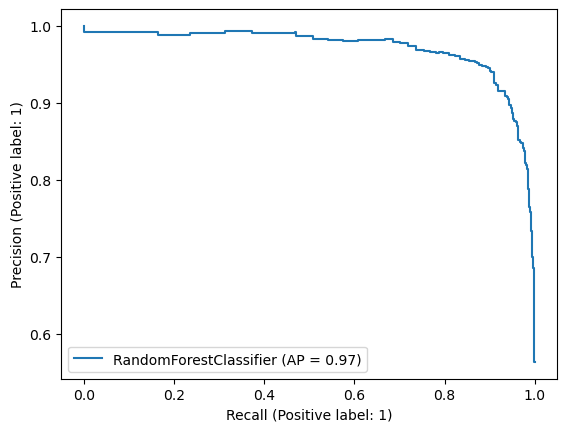

In [82]:
plot_metrics(rfc,X_test,y_test,"rfc")
plt.show()

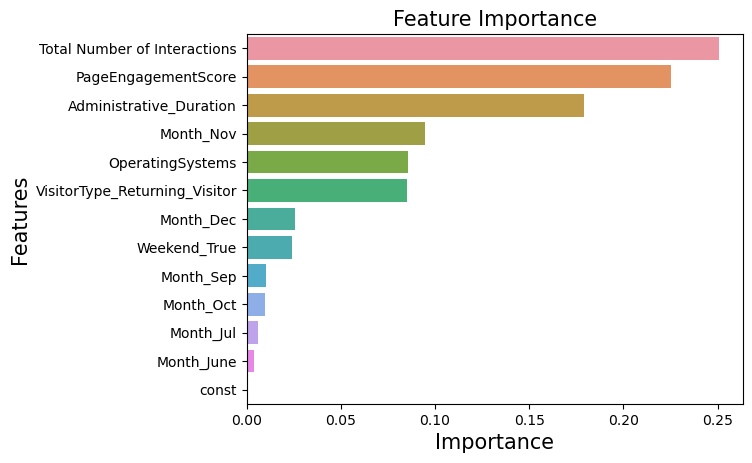

In [83]:
dt_important_features = pd.DataFrame({'Features': X_train.columns, 
                                   'Importance': rfc.feature_importances_})

dt_important_features = dt_important_features.sort_values('Importance', ascending = False)

sns.barplot(x = 'Importance', y = 'Features', data = dt_important_features)

plt.title('Feature Importance', fontsize = 15)
plt.xlabel('Importance', fontsize = 15)
plt.ylabel('Features', fontsize = 15)

plt.show()

### 6.4 XGBoost 

In [84]:
XGB = XGBClassifier(random_state=42)
XGB_model=XGB.fit(X_train, y_train)
y_pred = XGB_model.predict(X_test)

In [85]:
print_metrics(y_test,y_pred)

classification_report               precision    recall  f1-score   support

           0       0.95      0.94      0.95       737
           1       0.94      0.95      0.95       742

    accuracy                           0.95      1479
   macro avg       0.95      0.95      0.95      1479
weighted avg       0.95      0.95      0.95      1479

roc score 0.9458996368317687
accuracy 0.9459093982420554
precision 0.9436997319034852
recall 0.9487870619946092
f1score 0.946236559139785


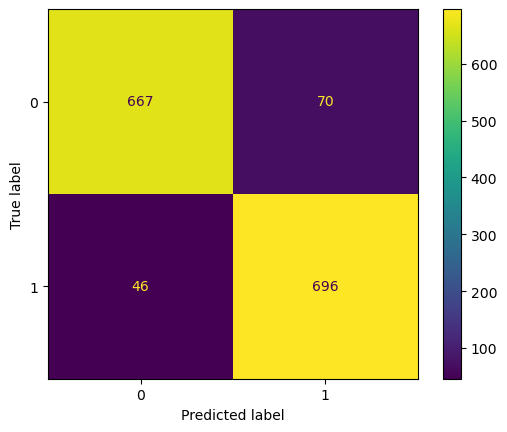

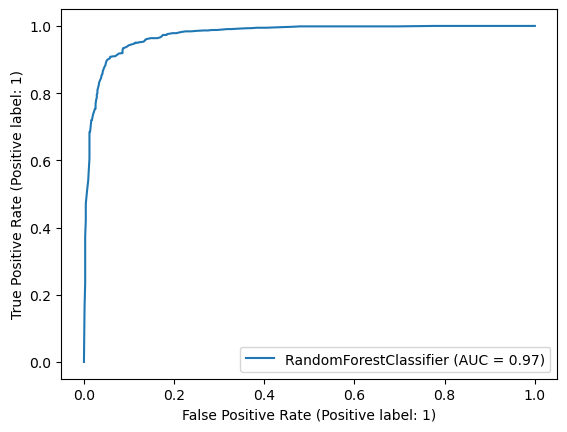

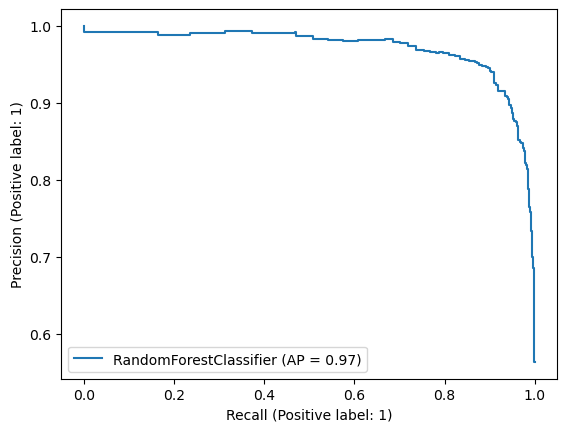

In [86]:
plot_metrics(rfc,X_test,y_test,"rfc")
plt.show()

In [87]:
XGB_tuned = XGBClassifier(max_depth= 5, learning_rate=0.1,min_child_weight= 5, n_estimators= 500,gamma=0.2)
XGB_tuned.fit(X_train, y_train)
y_pred= rfc_tuned.predict(X_test)
print_metrics(y_test, y_pred)

classification_report               precision    recall  f1-score   support

           0       0.82      0.82      0.82       737
           1       0.82      0.82      0.82       742

    accuracy                           0.82      1479
   macro avg       0.82      0.82      0.82      1479
weighted avg       0.82      0.82      0.82      1479

roc score 0.8194682675814752
accuracy 0.8194726166328601
precision 0.819650067294751
recall 0.8207547169811321
f1score 0.8202020202020203


In [88]:
y_pred= XGB_tuned.predict(X_test)
print_metrics(y_test, y_pred)

classification_report               precision    recall  f1-score   support

           0       0.95      0.93      0.94       737
           1       0.94      0.95      0.94       742

    accuracy                           0.94      1479
   macro avg       0.94      0.94      0.94      1479
weighted avg       0.94      0.94      0.94      1479

roc score 0.9425029349698456
accuracy 0.9425287356321839
precision 0.9362549800796812
recall 0.9501347708894878
f1score 0.9431438127090301


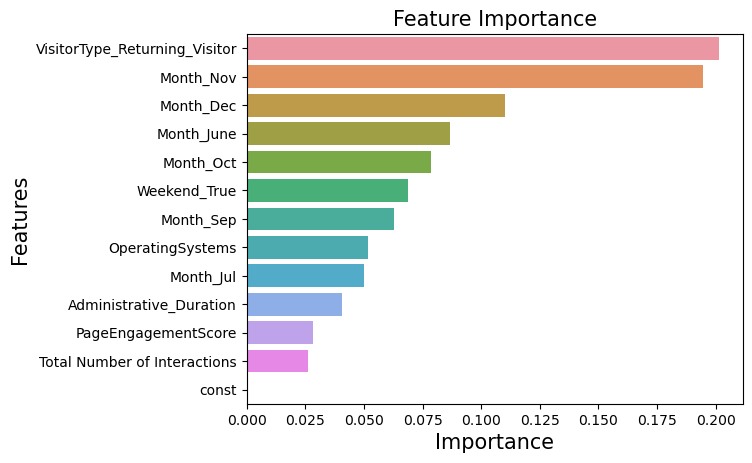

In [90]:
XGB_important_features = pd.DataFrame({'Features': X_train.columns, 
                                   'Importance': XGB_tuned.feature_importances_})

XGB_important_features = dt_important_features.sort_values('Importance', ascending = False)

sns.barplot(x = 'Importance', y = 'Features', data = dt_important_features)

plt.title('Feature Importance', fontsize = 15)
plt.xlabel('Importance', fontsize = 15)
plt.ylabel('Features', fontsize = 15)

plt.show()

In [95]:
XGB_important_features["Features"].values

array(['VisitorType_Returning_Visitor', 'Month_Nov', 'Month_Dec',
       'Month_June', 'Month_Oct', 'Weekend_True', 'Month_Sep',
       'OperatingSystems', 'Month_Jul', 'Administrative_Duration',
       'PageEngagementScore', 'Total Number of Interactions', 'const'],
      dtype=object)

### 6.5 Business Interpretation:-